In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def u_0(x):
    """Initial data in real coordinates"""
    return 0.5 - abs(x - 0.5)

def heat_equation_solution_1(dt,dx,u_0):
    """u_t = u_xx on [0,1]x[0,1] with Direchlet boundary conditions
Forward differencing in time, centered differencing in space."""
    def index_to_real(j,n):
        """Inputs are indices, outputs are real coordinates"""
        return j*dx, n*dt

    def u_0_indexed(j):
        """Initial data in index coordinates"""
        real_space, real_time = index_to_real(j,0)
        return u_0(real_space)

    J = int(1/dx)
    N = int(1/dt)
    alpha = dt/(dx ** 2)
    solution = np.zeros([J+1,N+1]) #First index is space, second index is time

    #define initial condition
    for j in range(J):
        solution[j,0] = u_0_indexed(j)
        
    #main for loops
    for n in range(N):
        for j in range(1,J):
            solution[j,n+1] = solution[j,n] + alpha* (solution[j+1, n]- 2 * solution[j,n]+solution[j-1,n])
    return solution

def plot_soln(solution,dt,dx):
    J = int(1/dx)
    N = int(1/dt)
    X_values = dx*np.arange(J+1)
    Y_values = np.zeros([J+1])
    for n in range(N):
        Y_values[:] = solution[:,n]
        plt.plot(X_values, Y_values)
        plt.ylabel(f'u solution at time {dt*n}')
        plt.show()

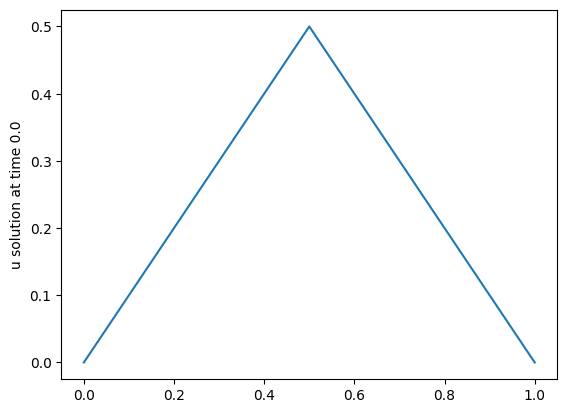

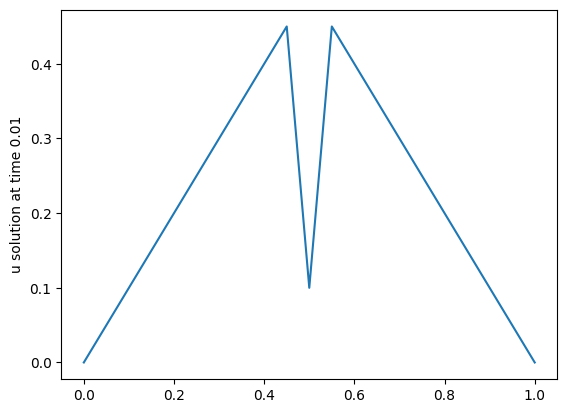

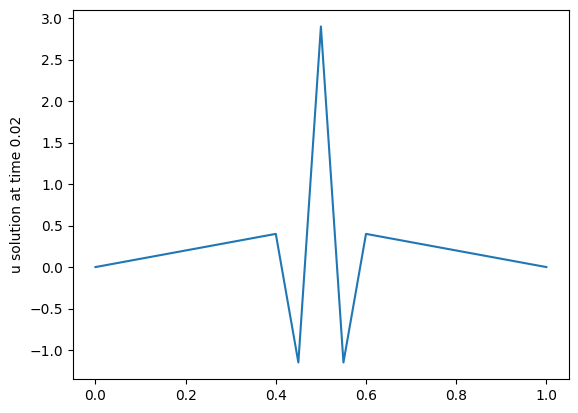

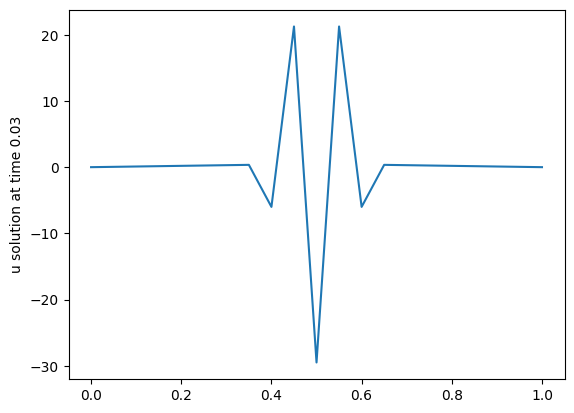

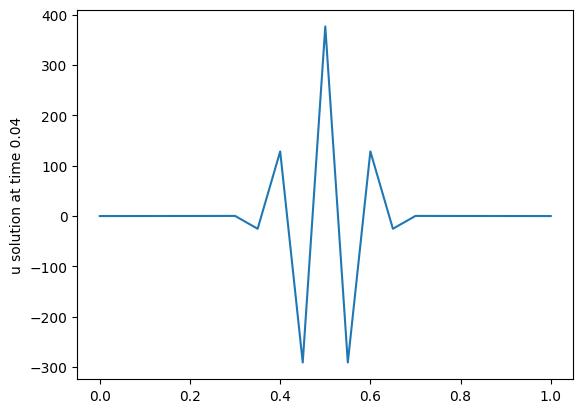

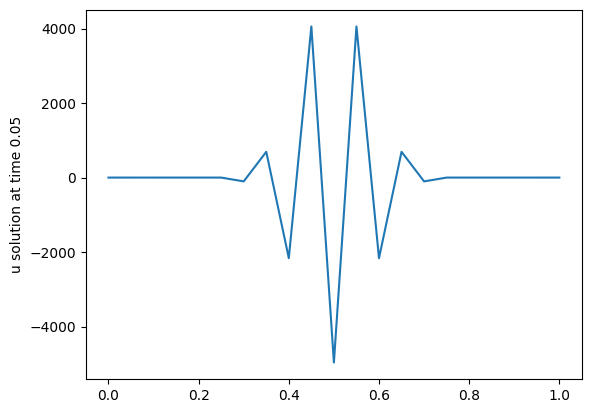

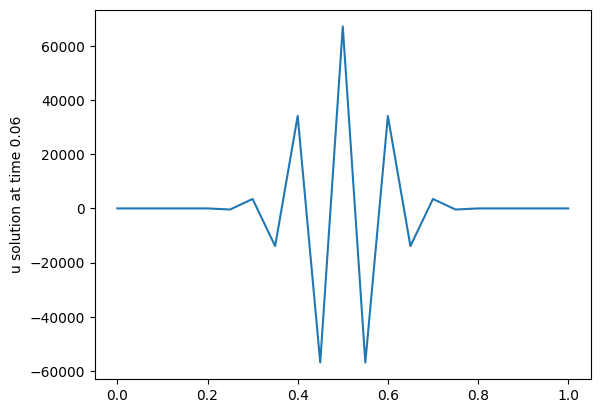

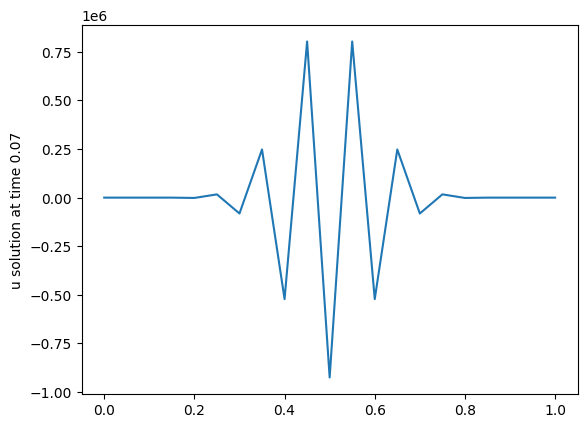

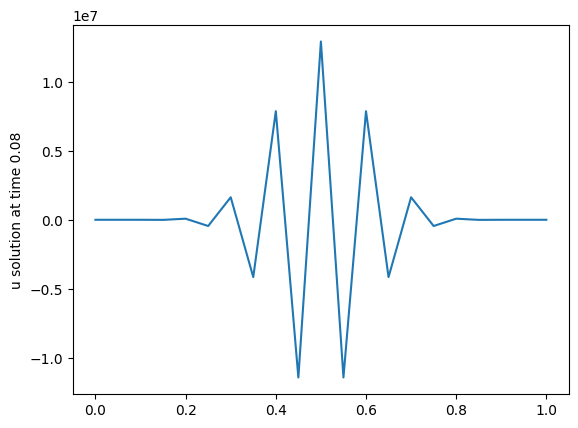

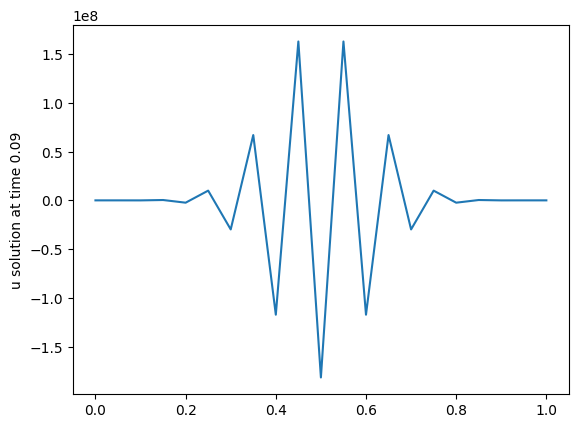

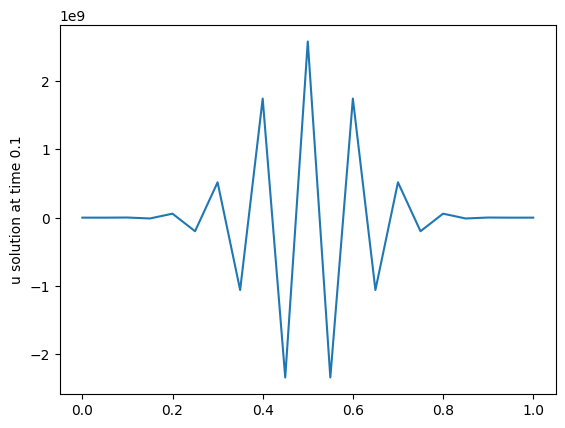

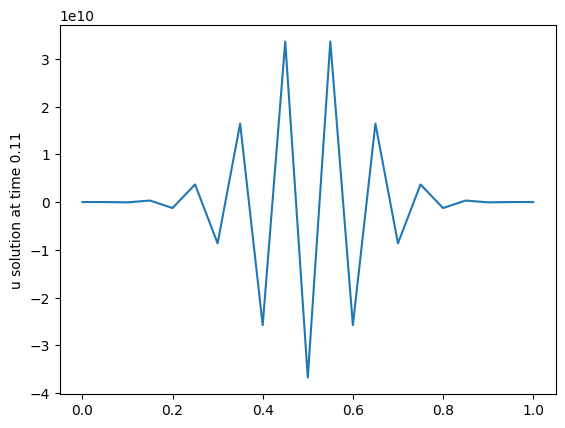

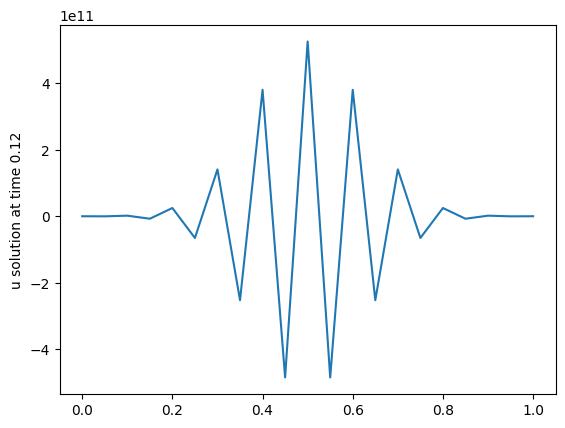

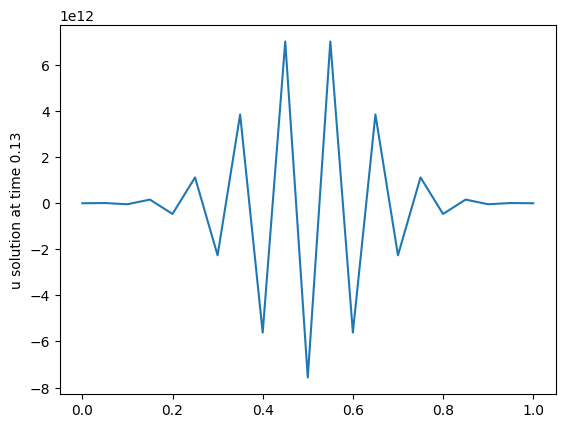

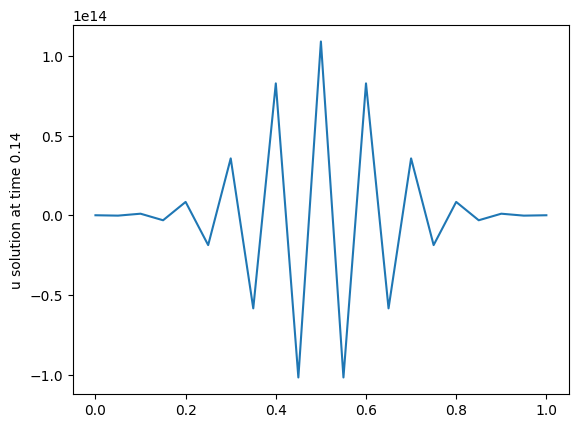

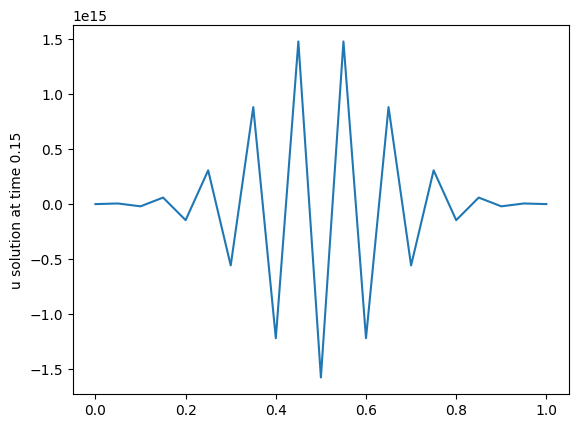

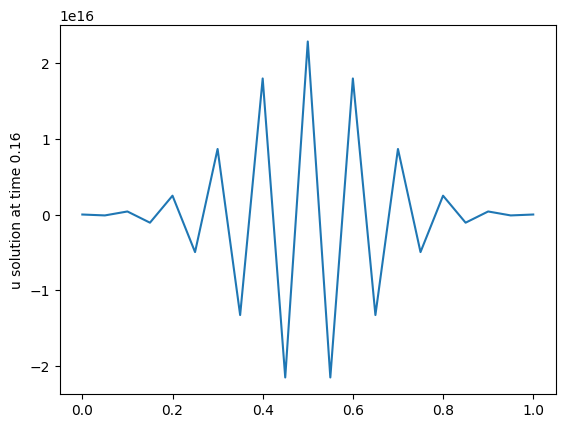

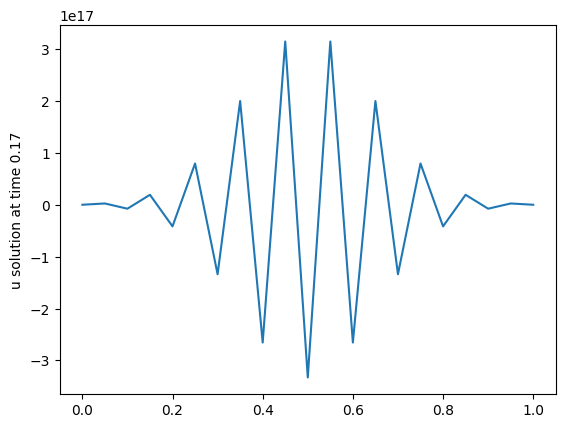

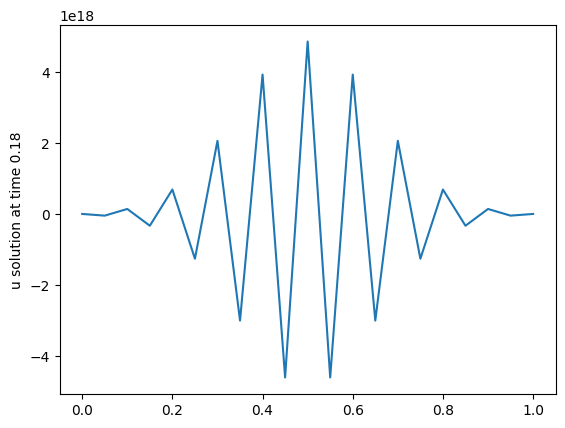

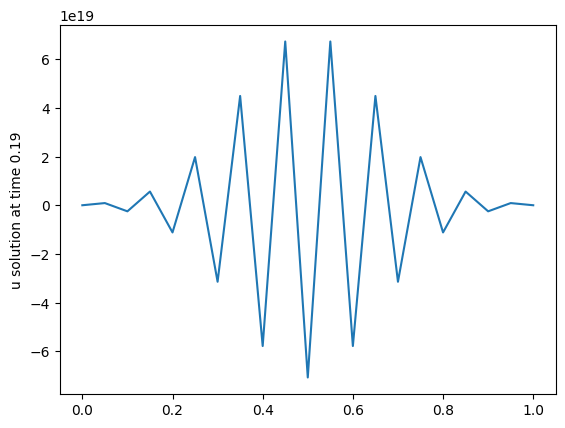

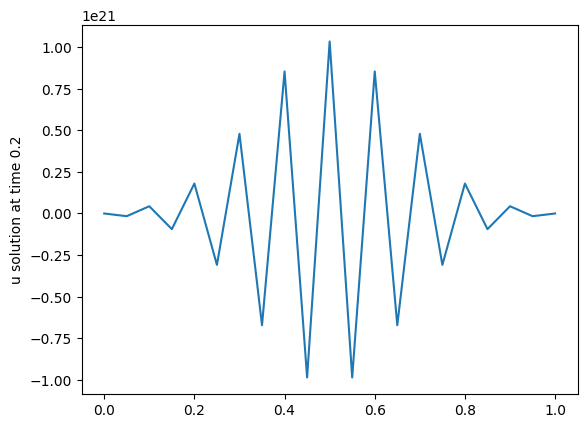

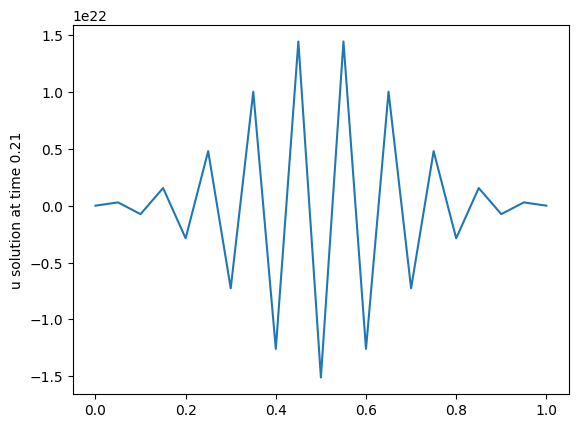

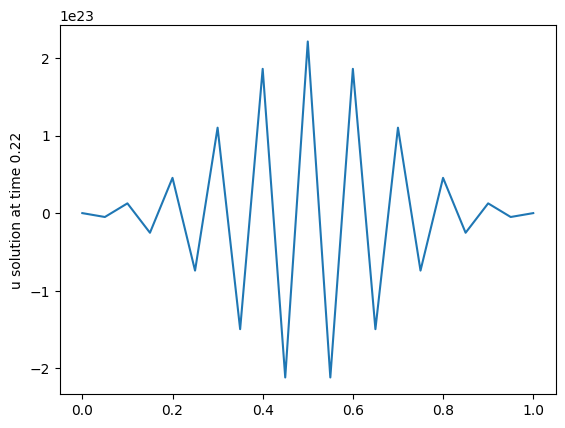

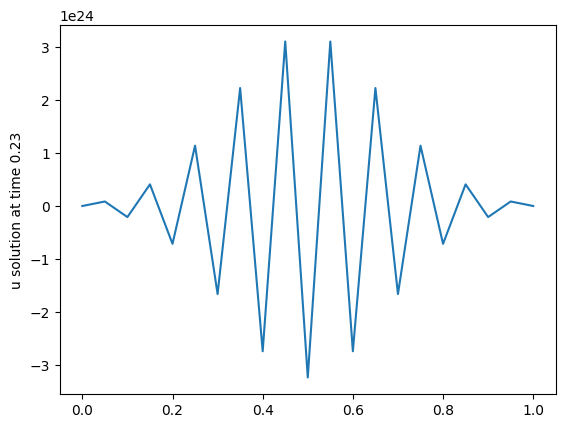

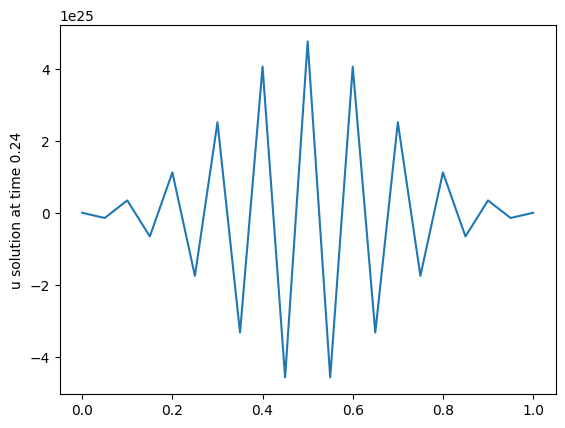

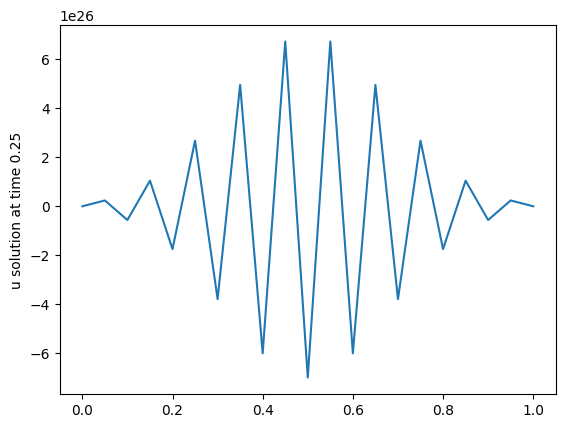

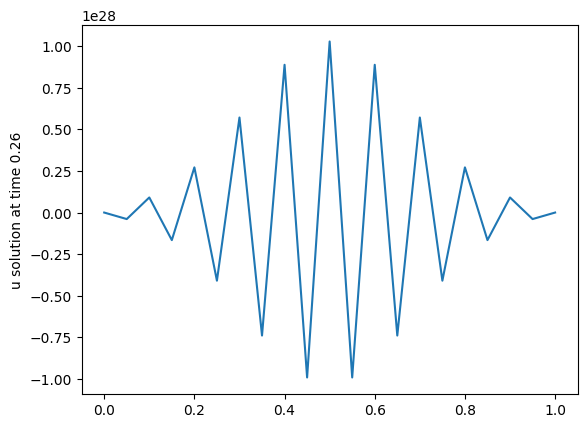

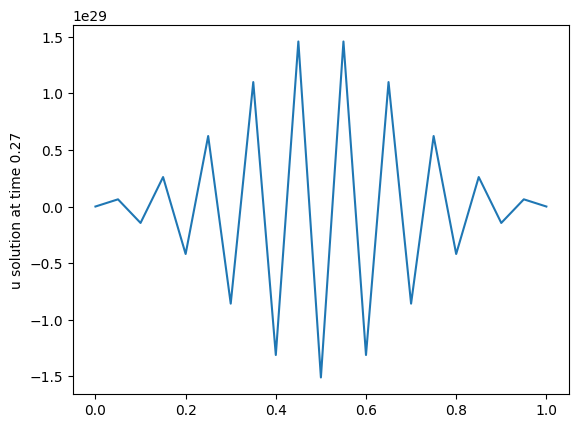

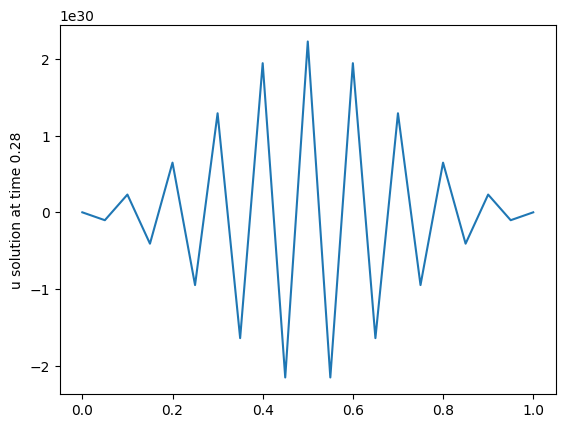

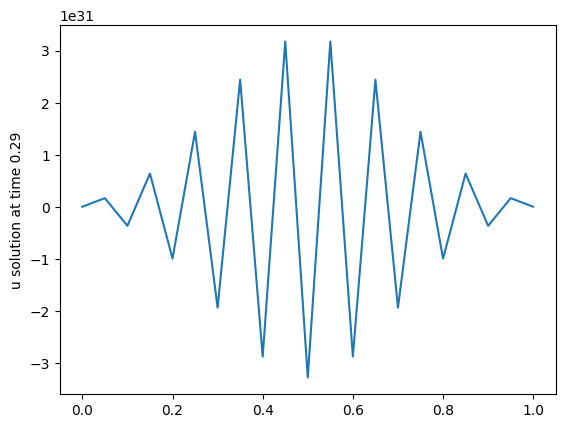

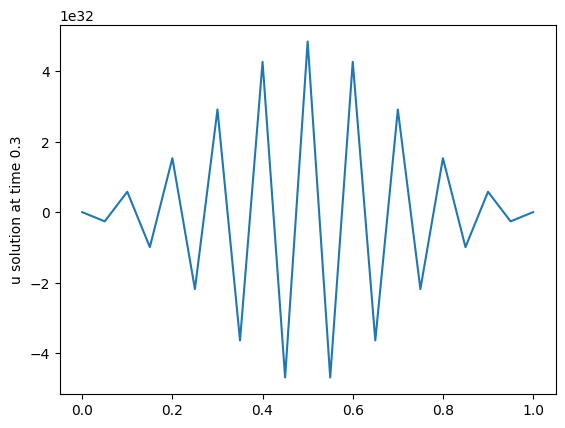

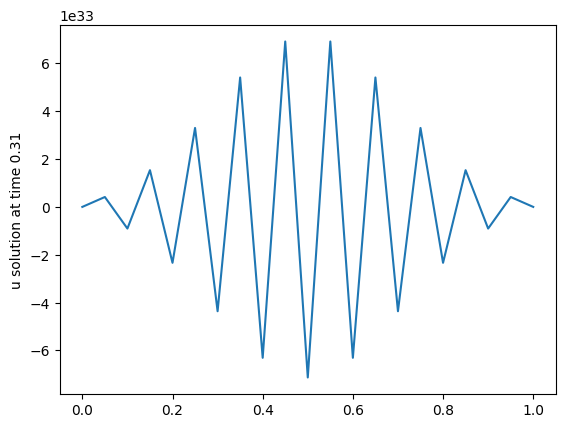

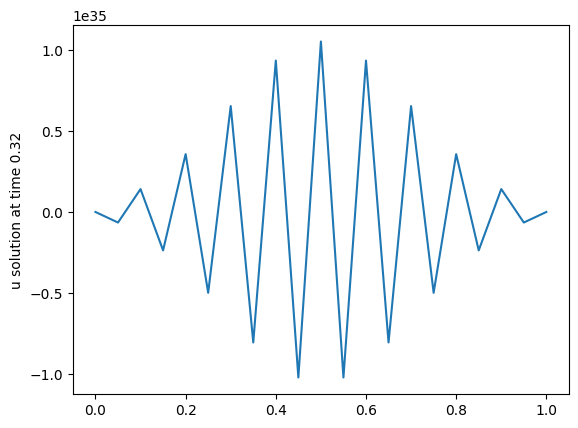

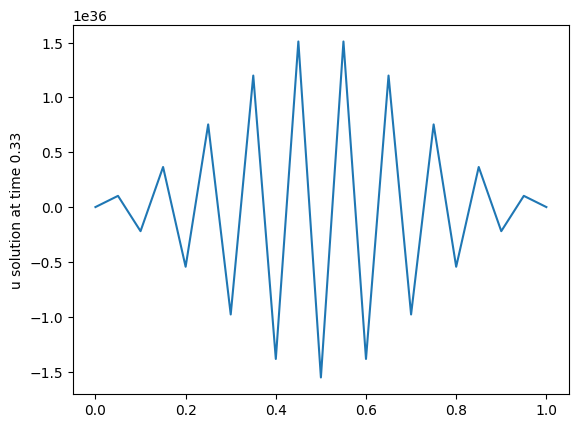

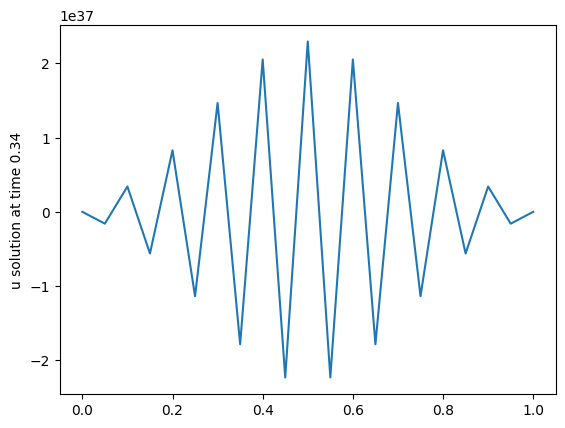

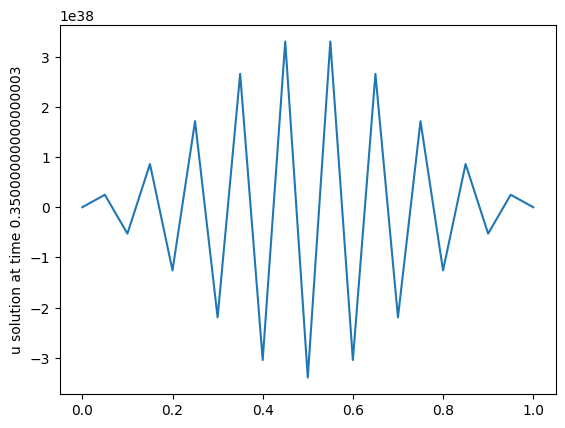

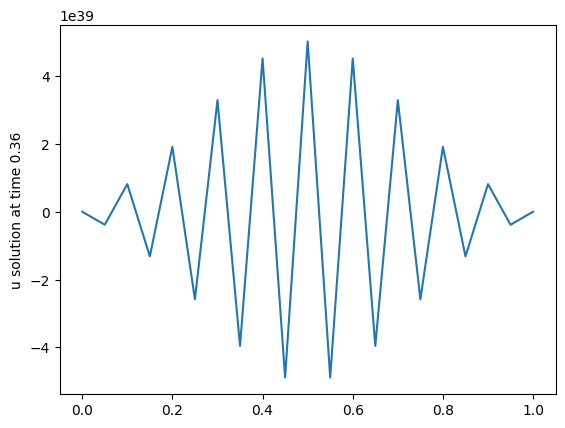

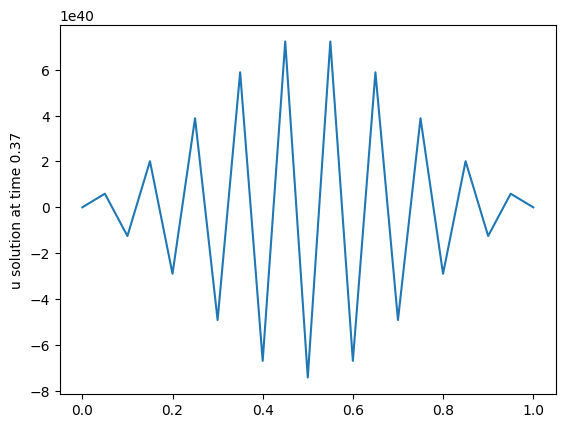

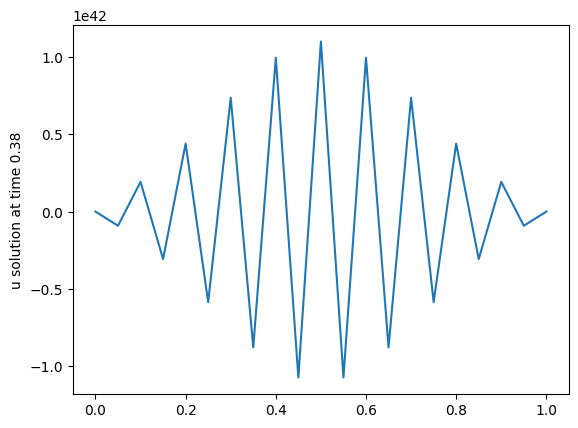

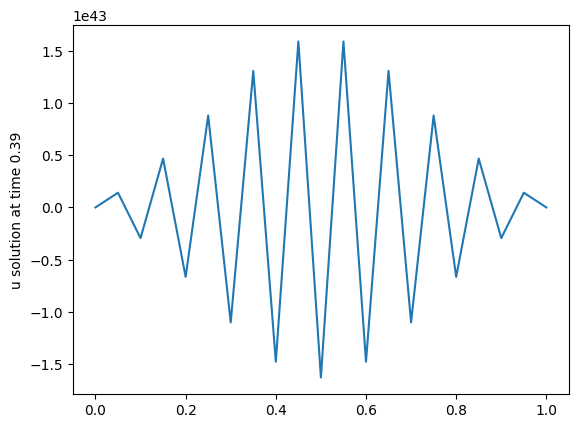

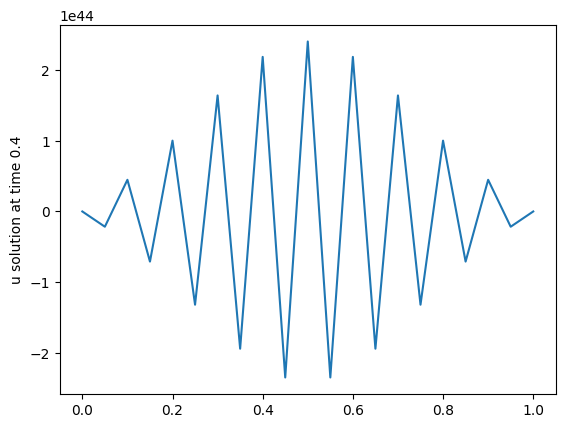

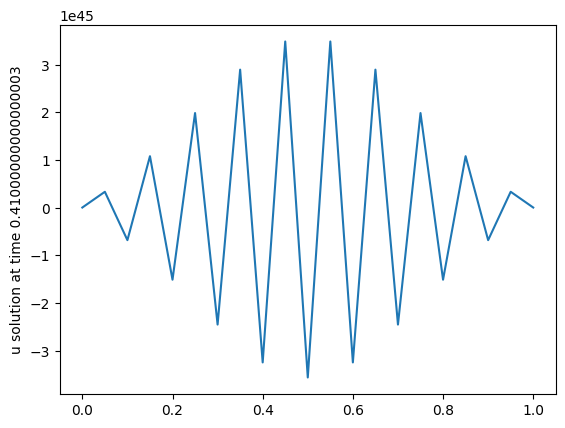

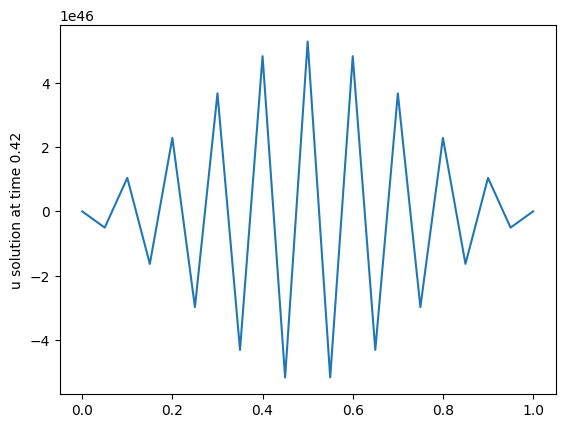

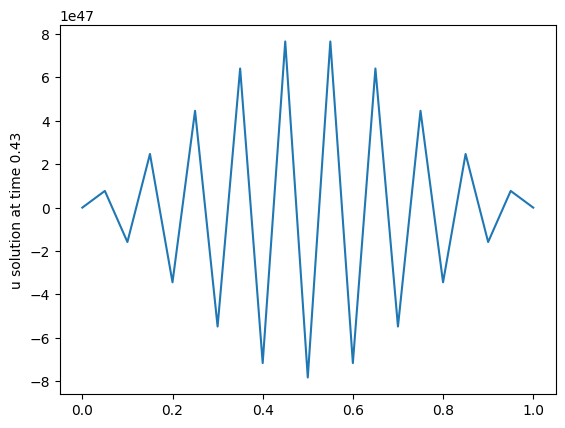

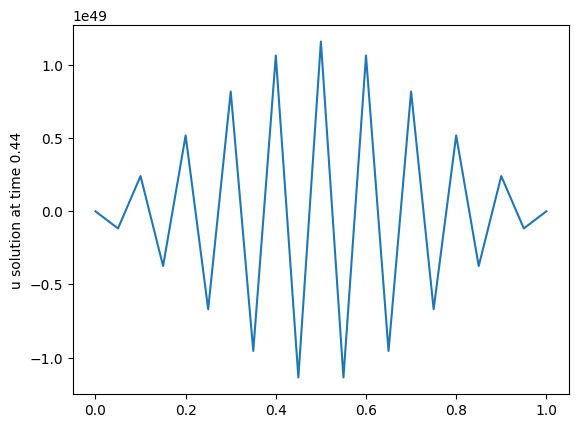

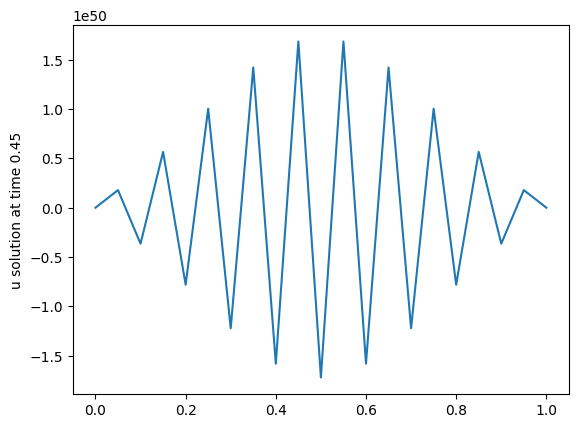

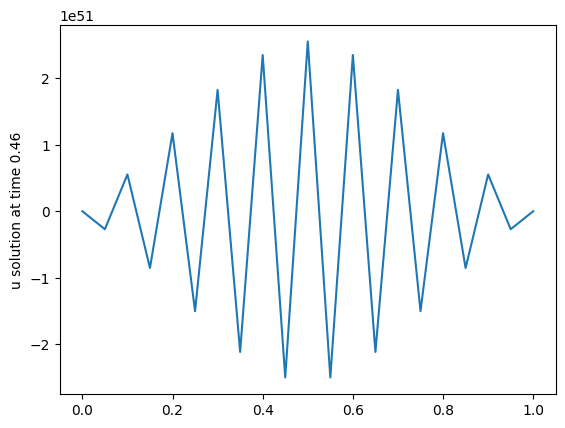

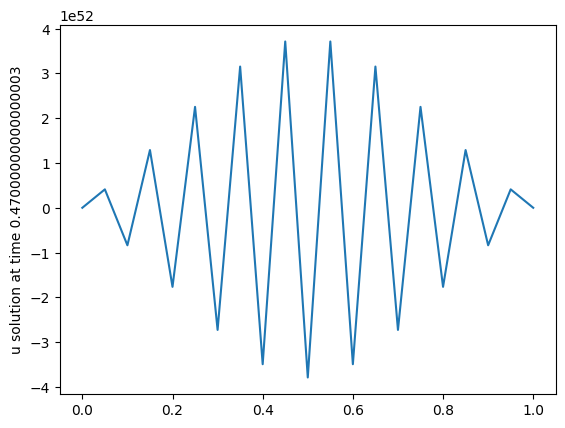

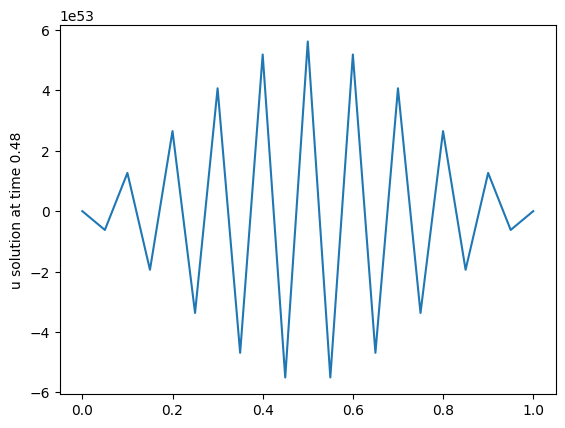

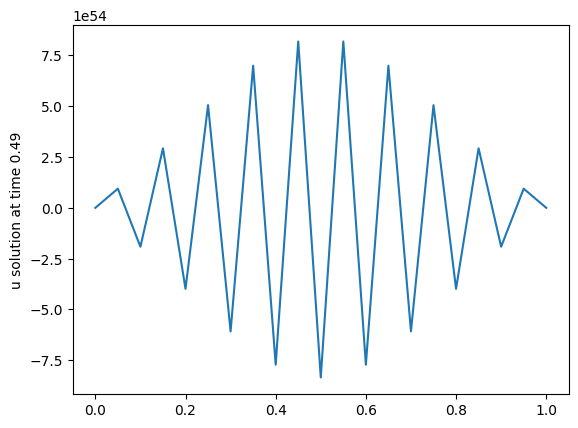

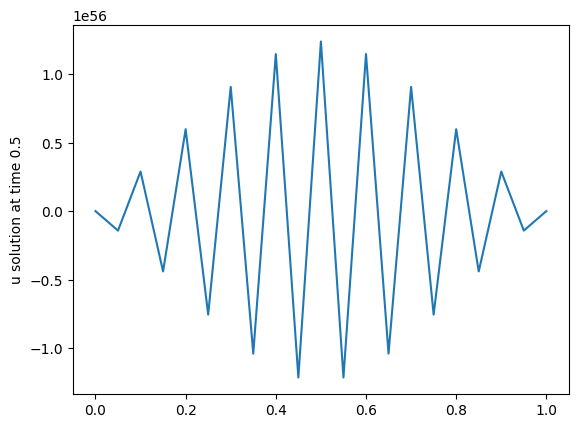

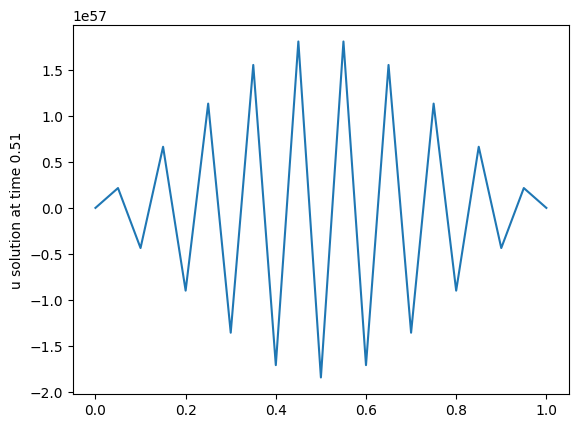

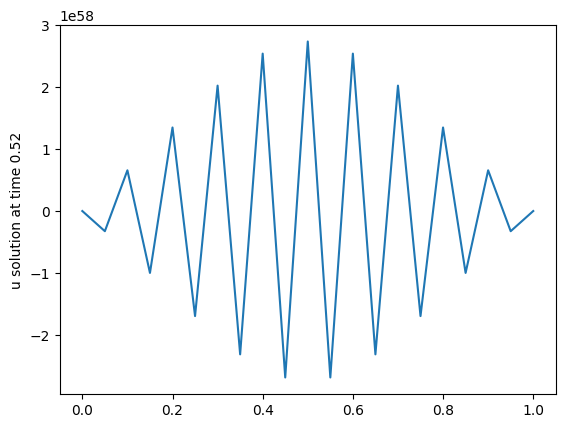

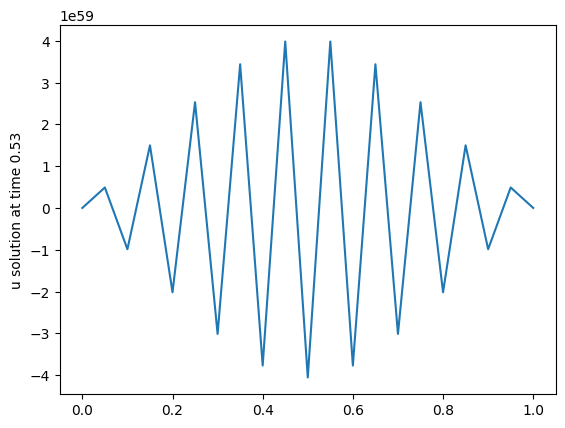

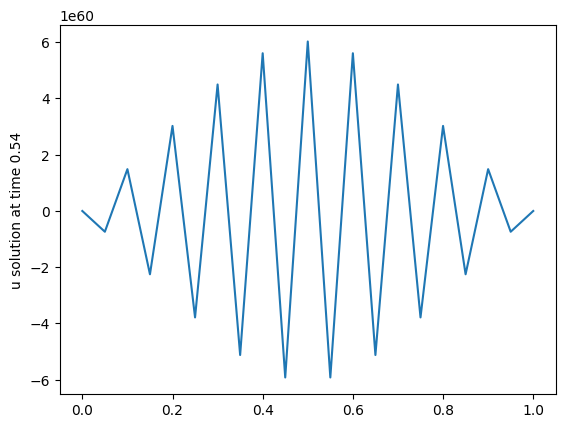

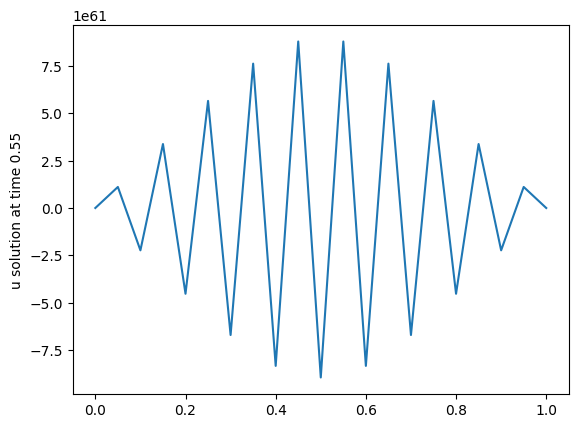

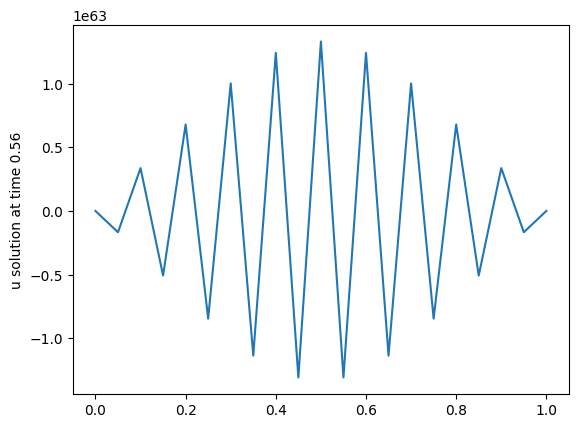

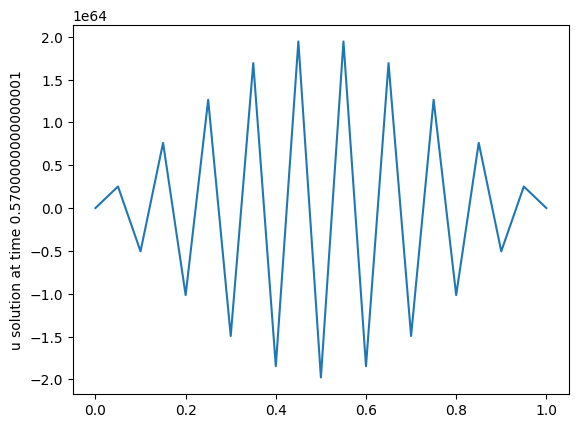

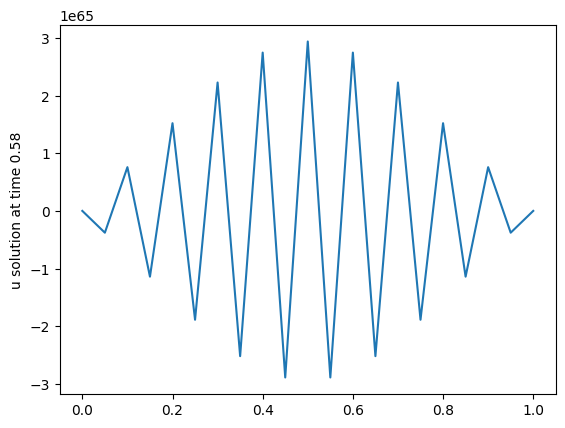

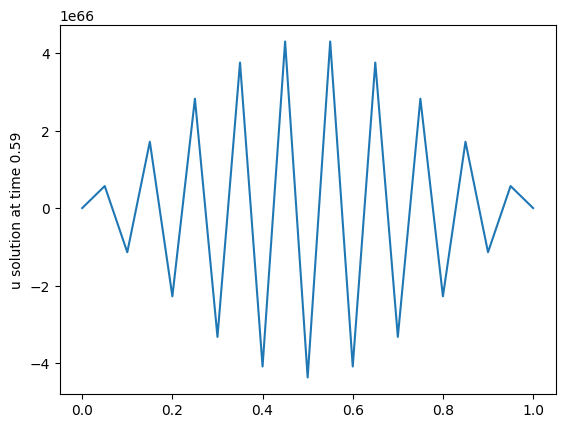

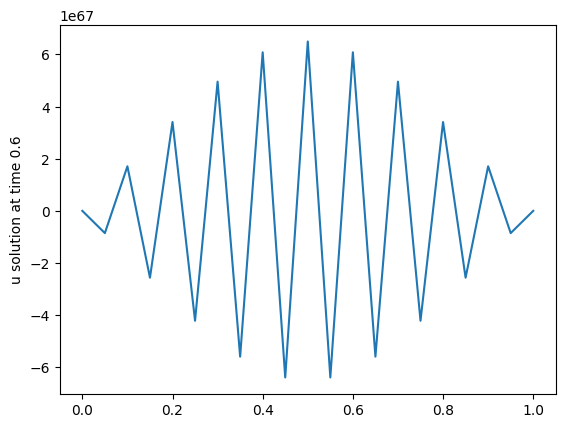

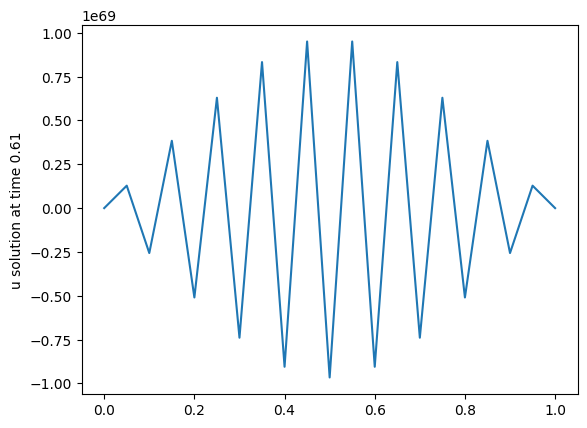

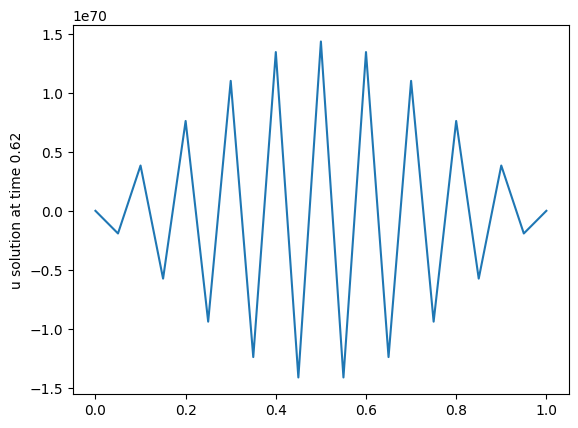

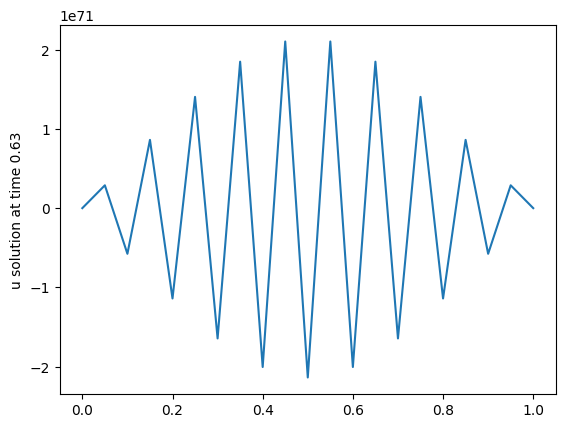

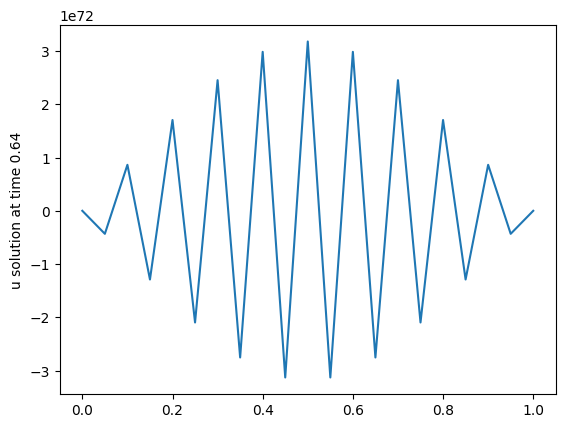

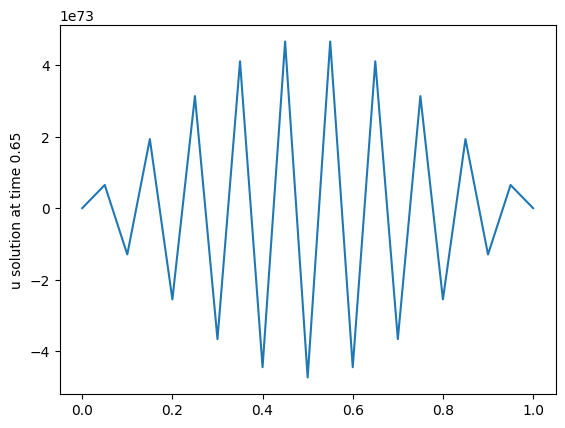

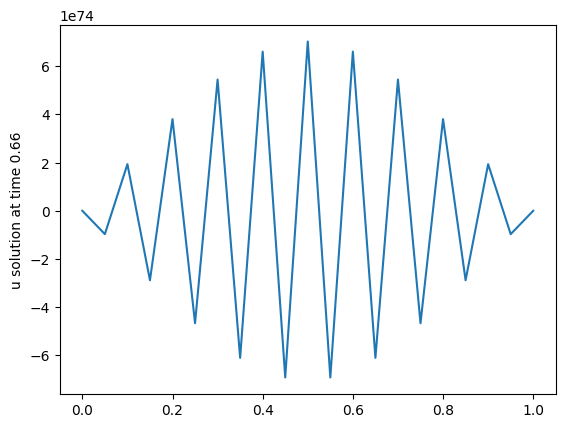

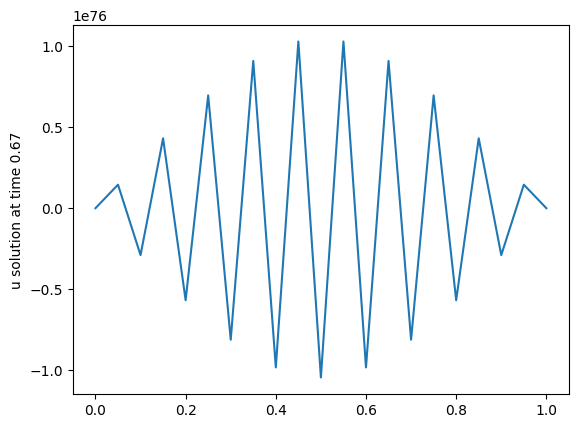

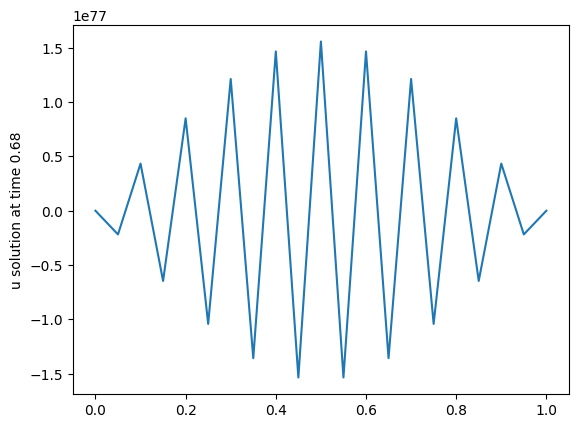

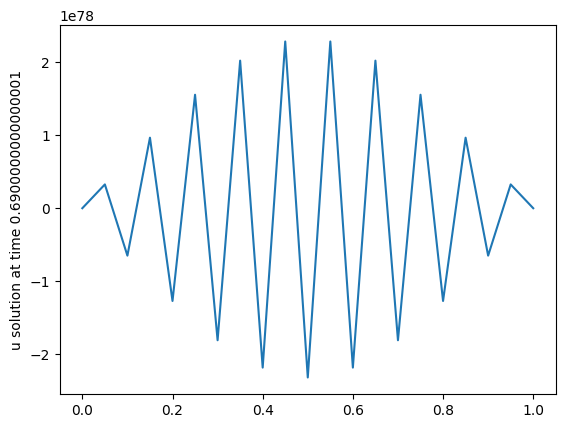

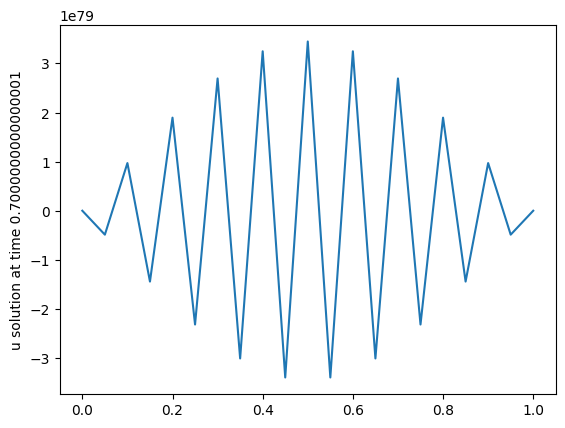

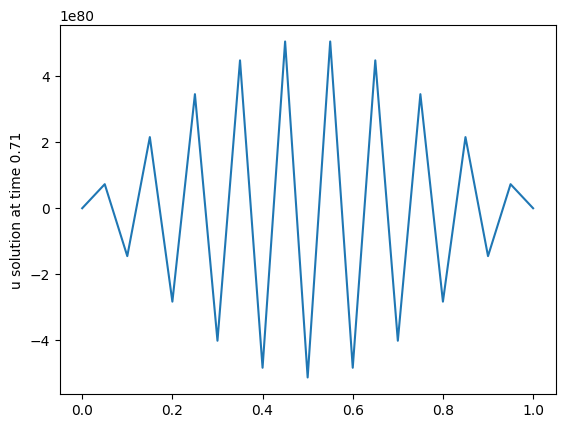

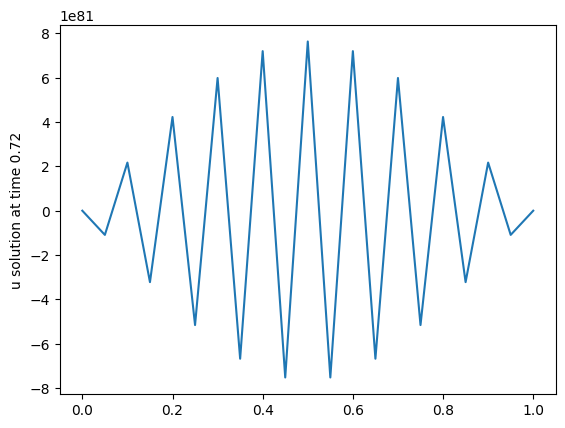

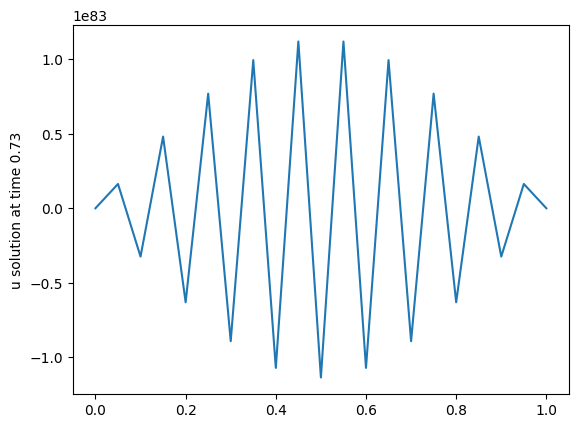

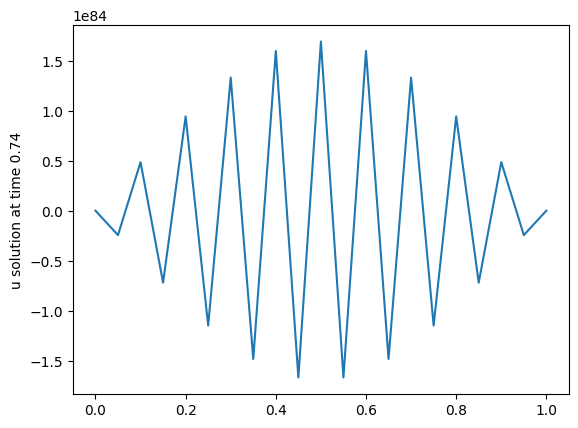

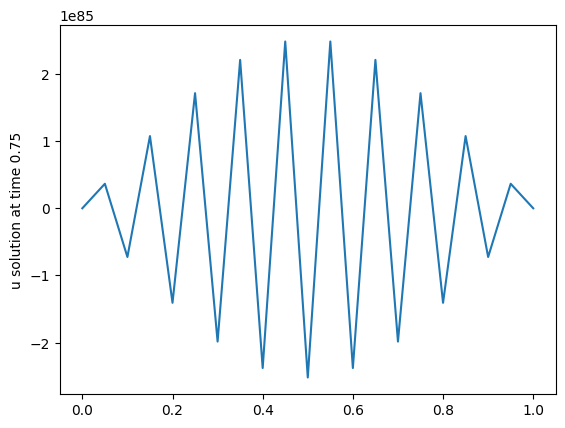

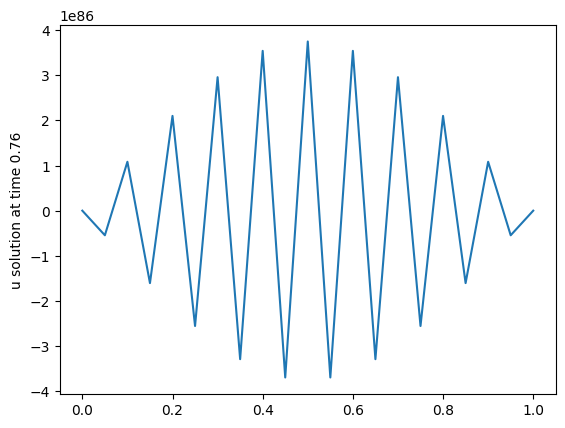

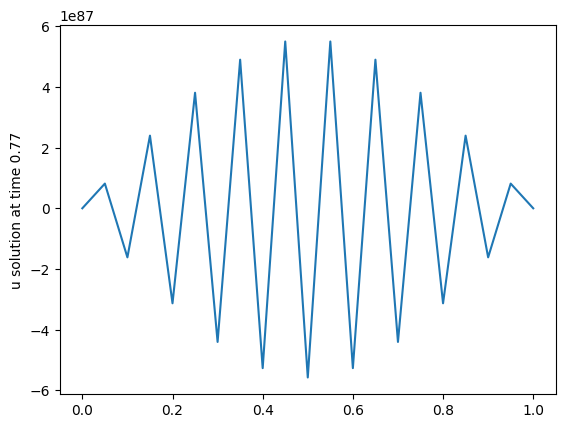

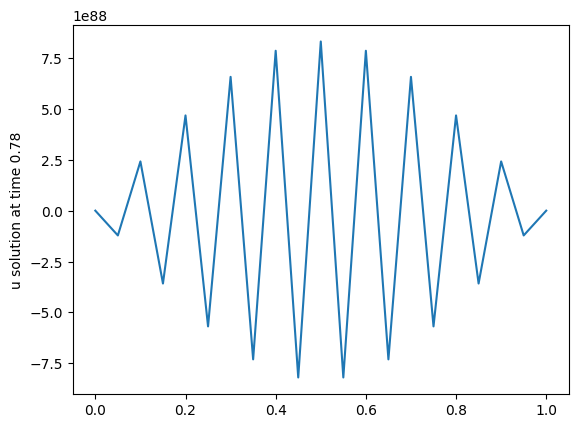

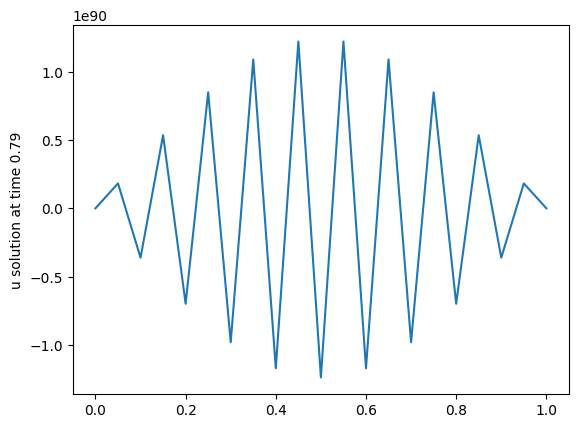

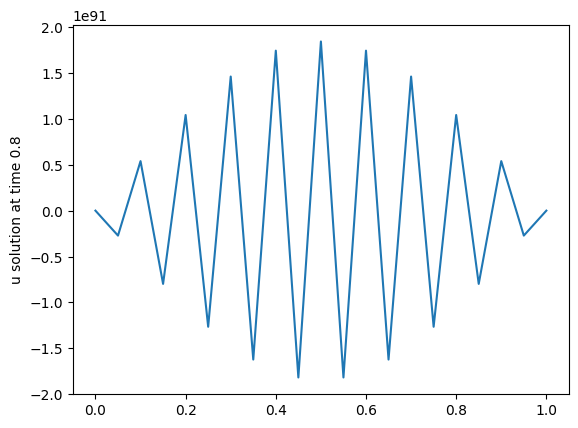

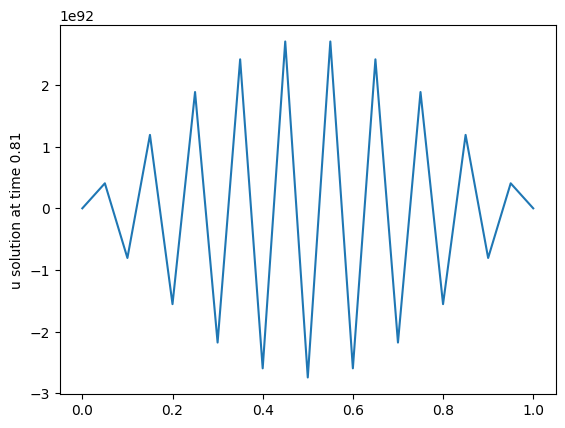

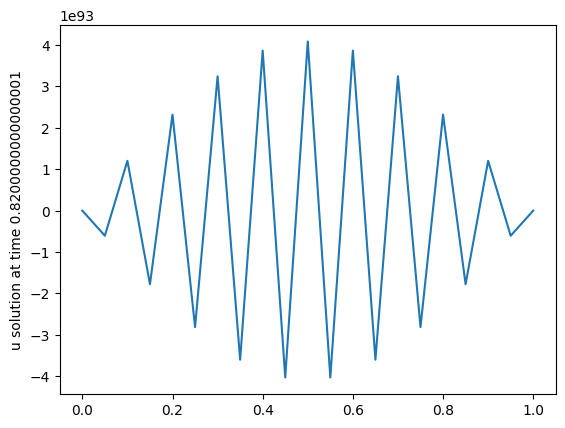

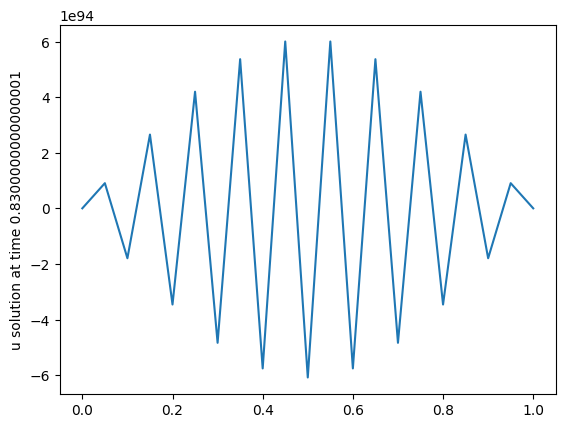

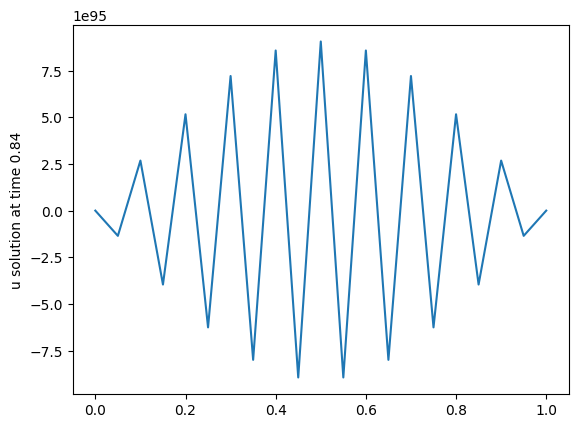

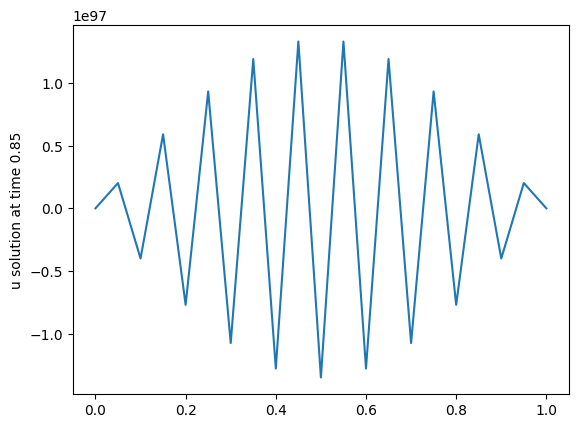

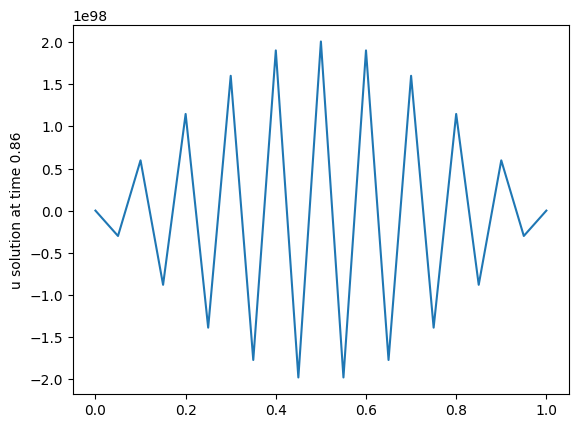

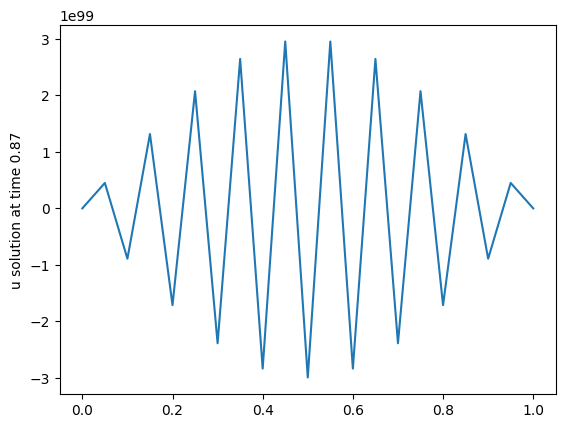

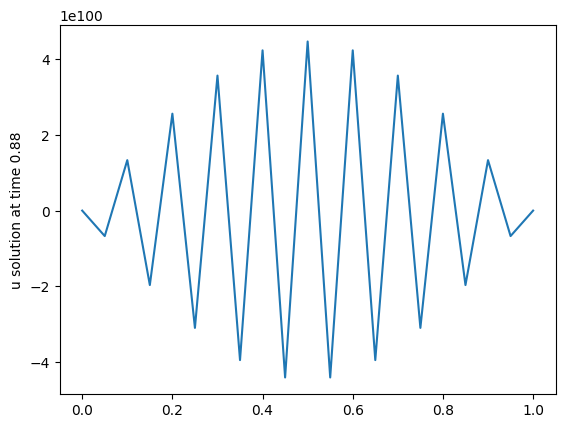

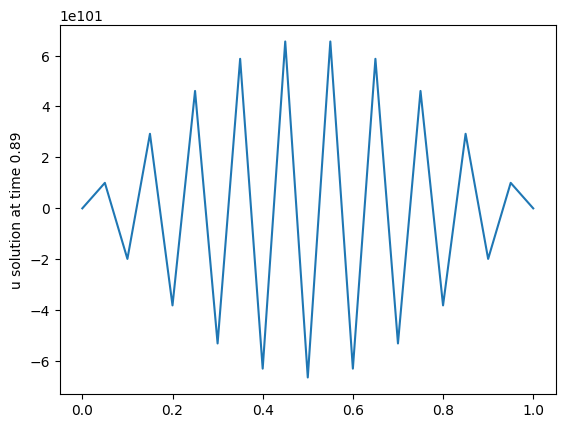

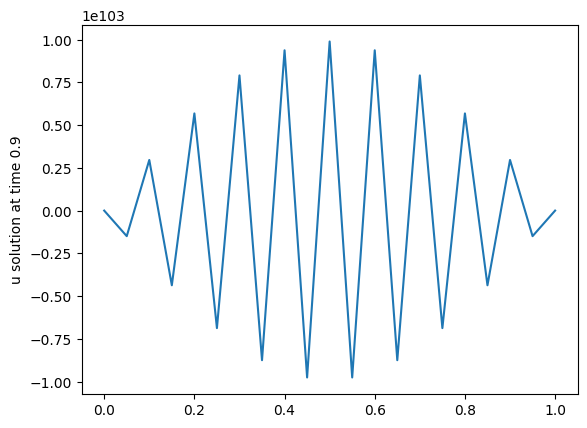

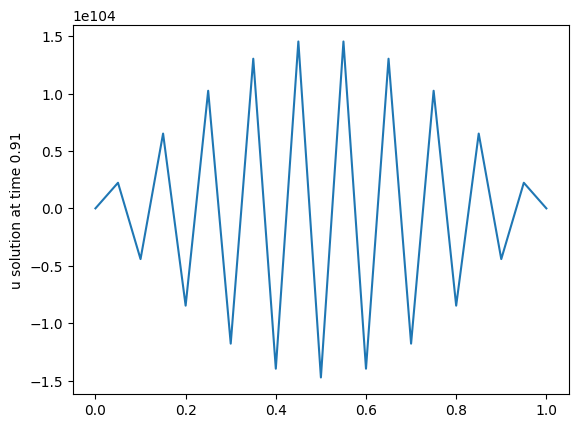

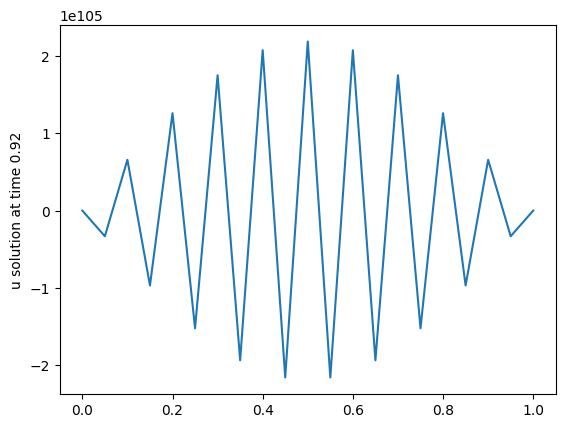

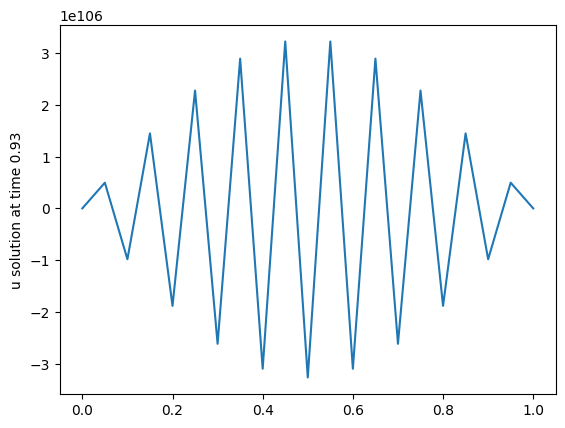

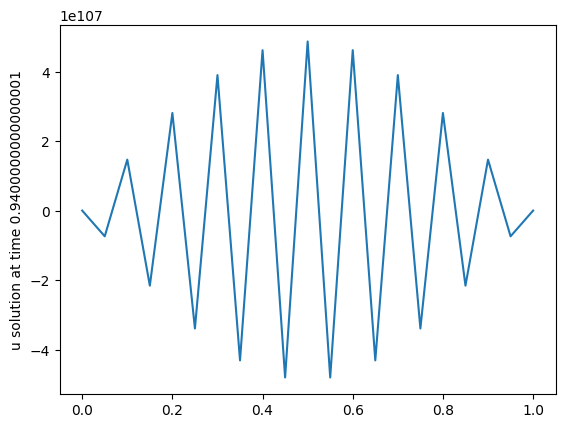

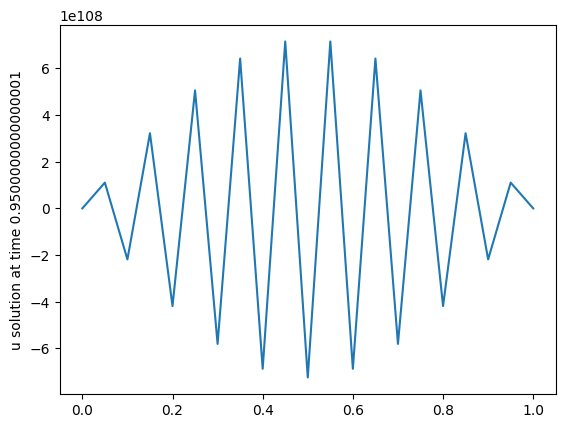

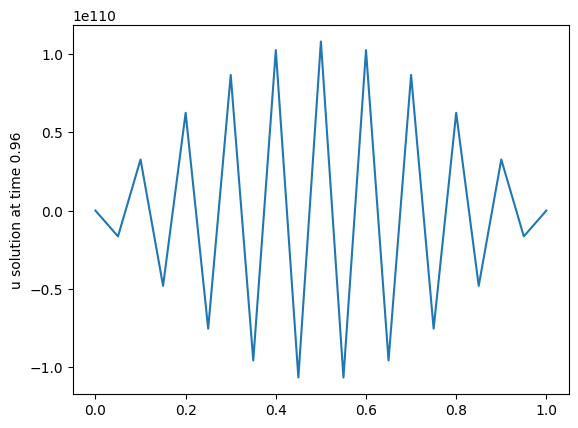

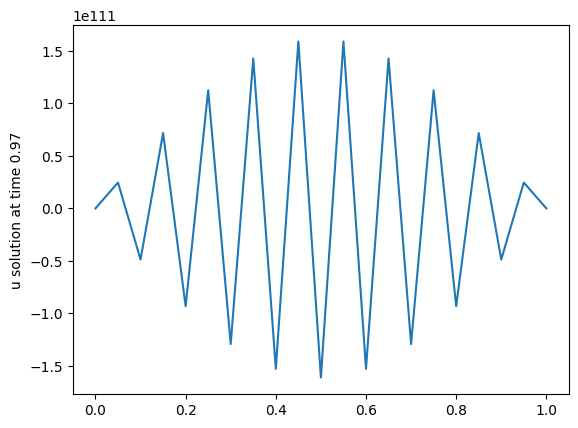

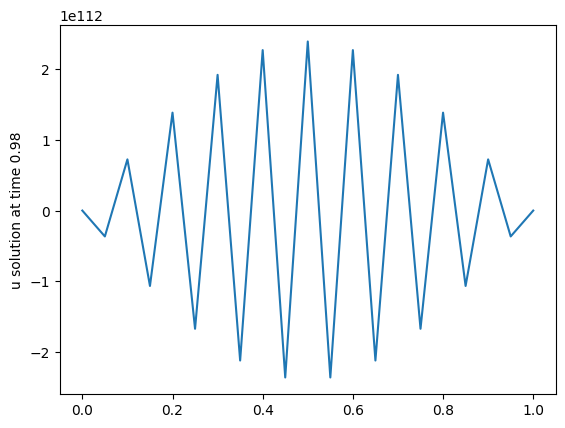

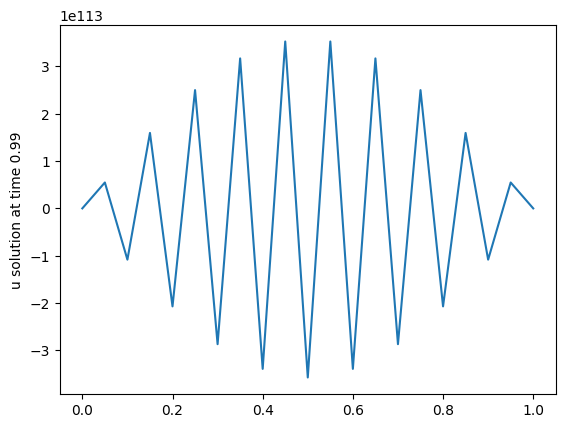

In [3]:
dt = 0.01
dx = 0.05
solution = heat_equation_solution_1(dt,dx,u_0)
plot_soln(solution,dt,dx)

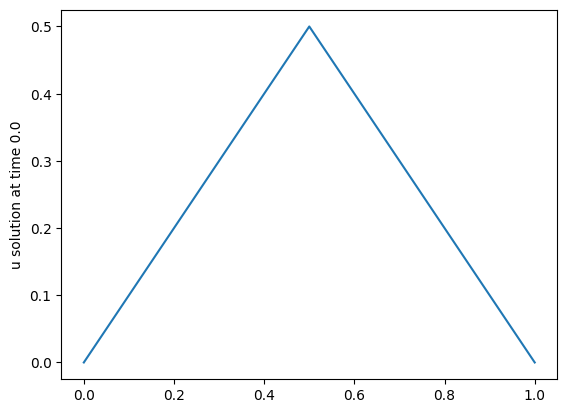

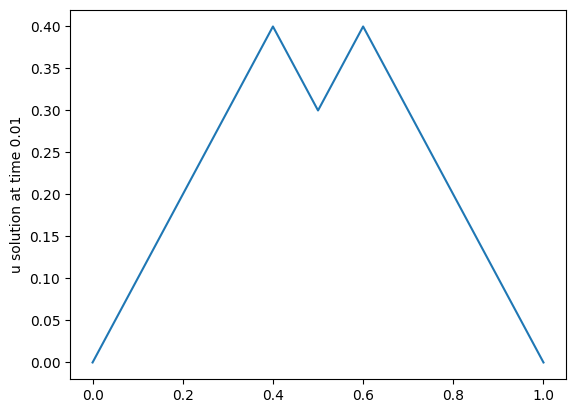

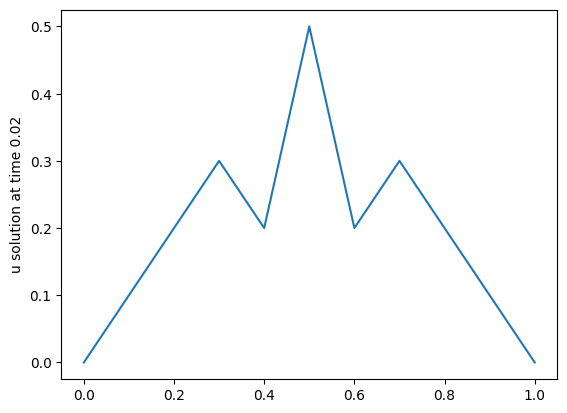

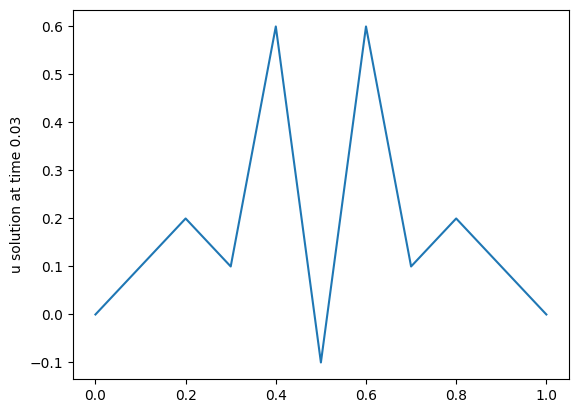

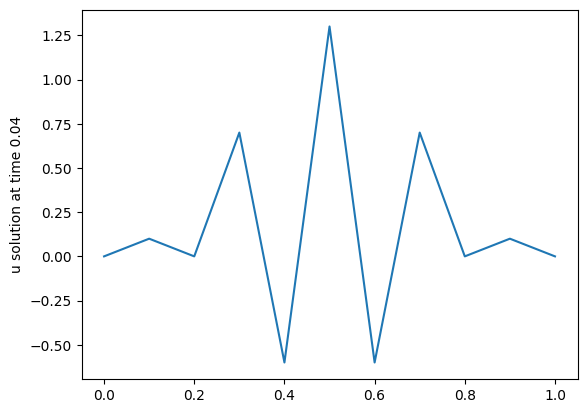

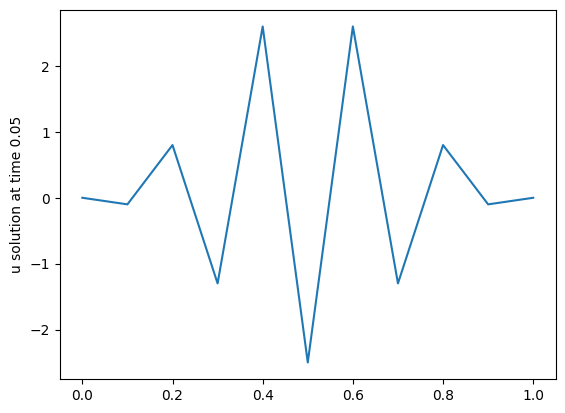

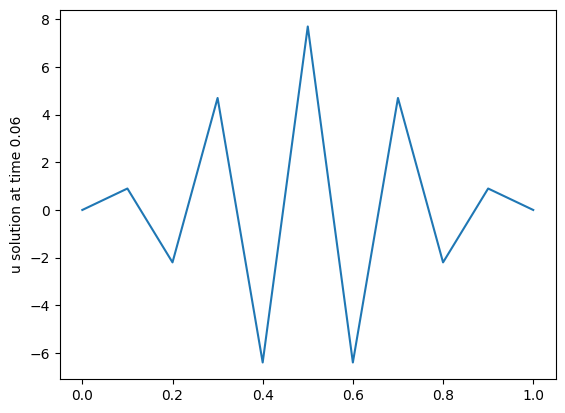

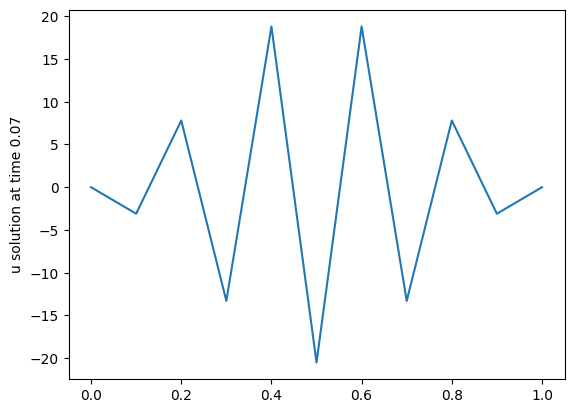

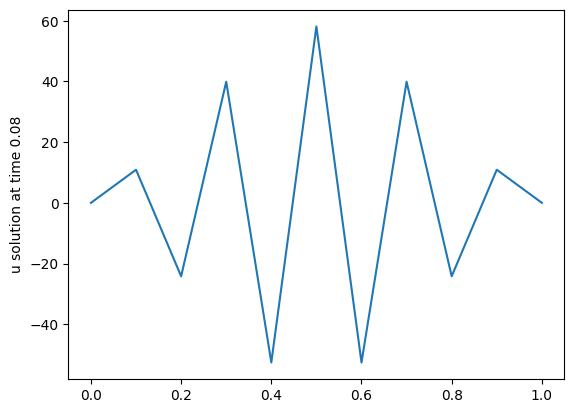

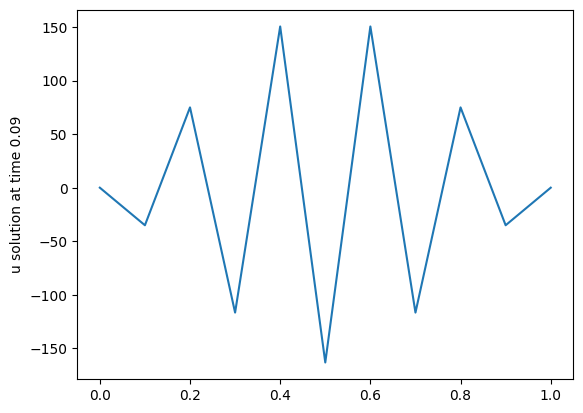

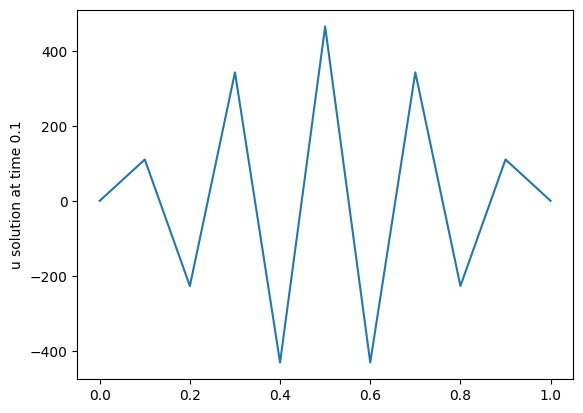

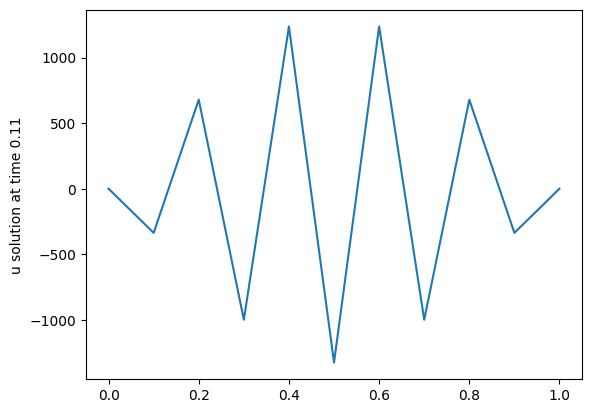

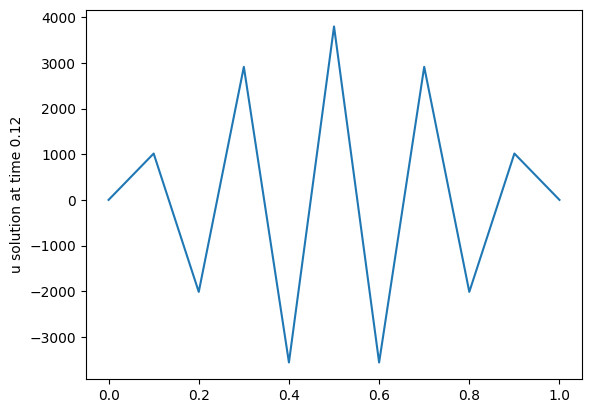

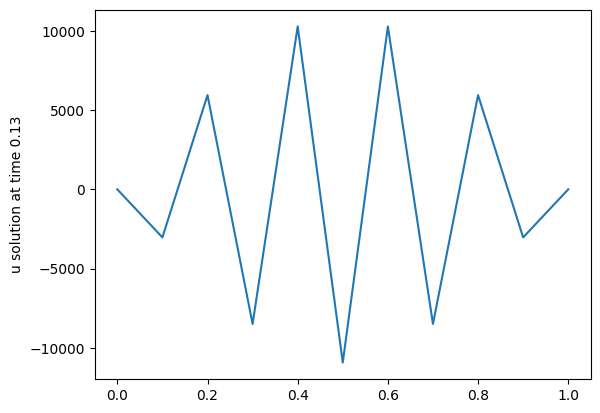

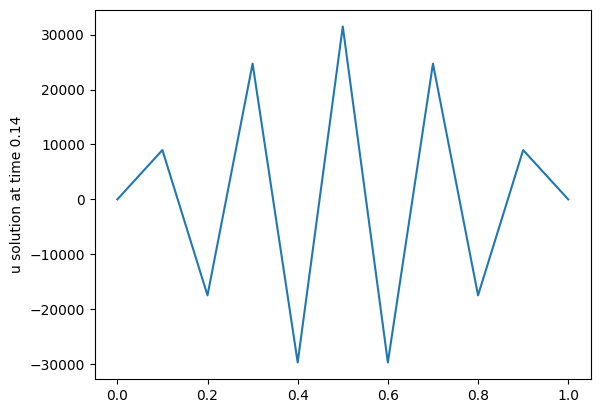

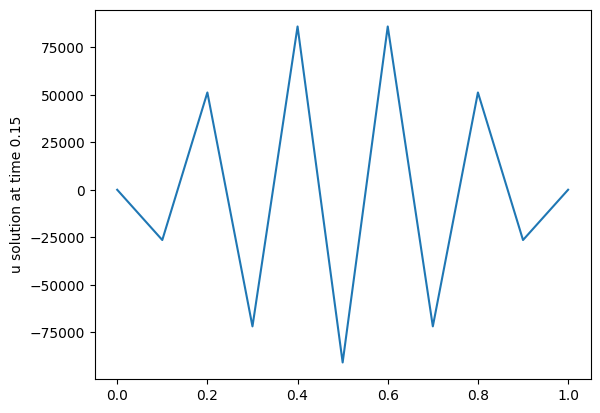

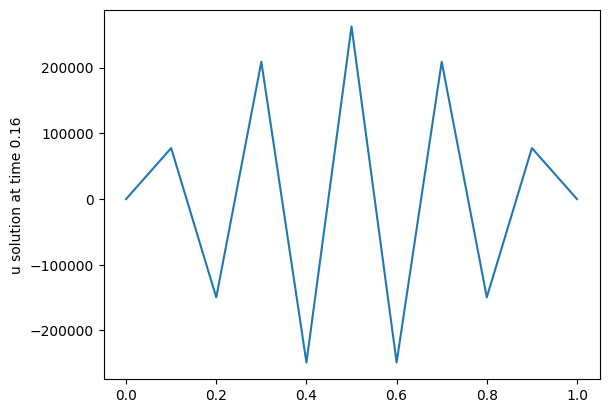

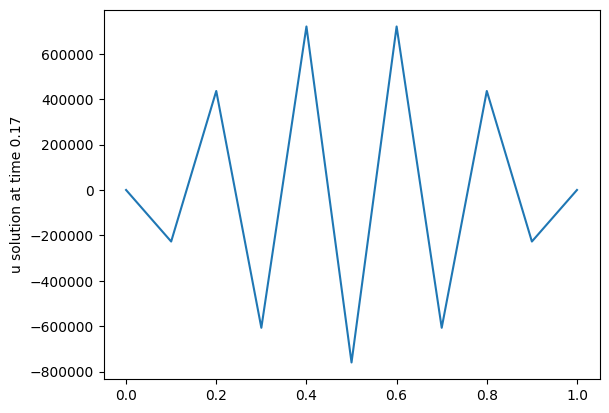

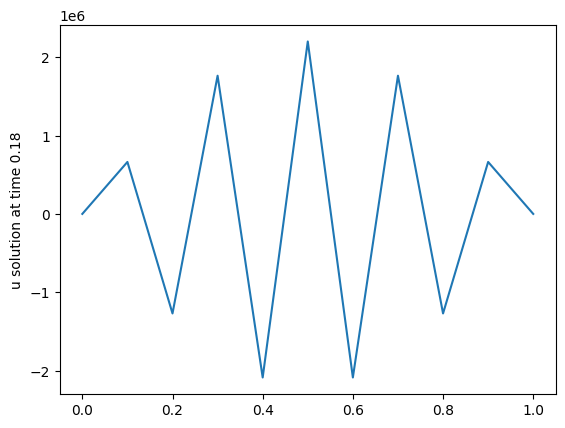

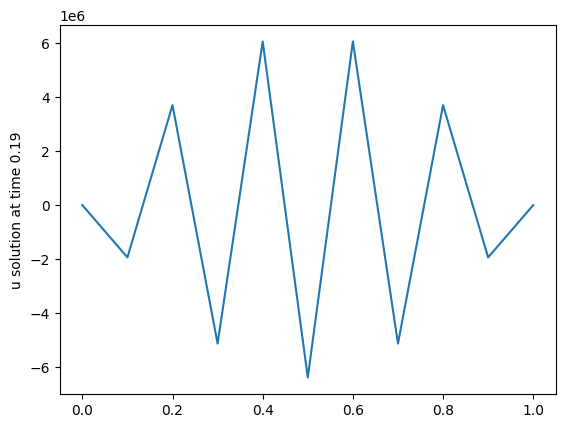

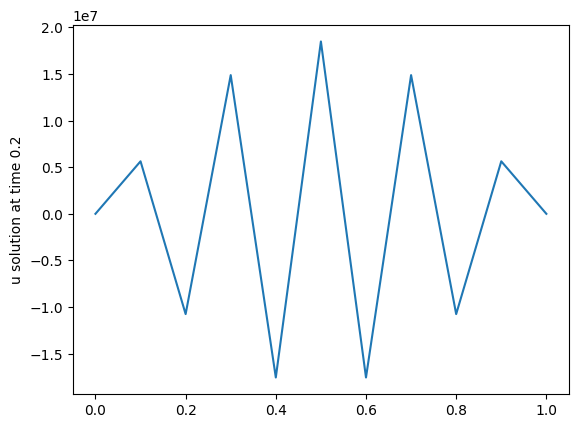

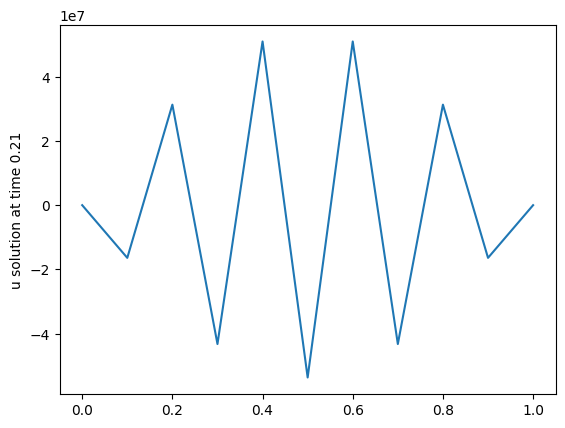

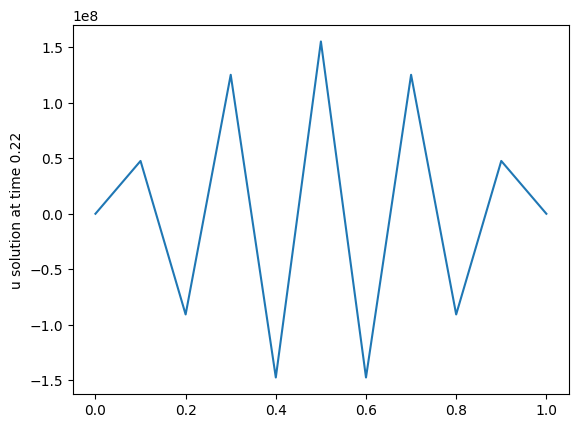

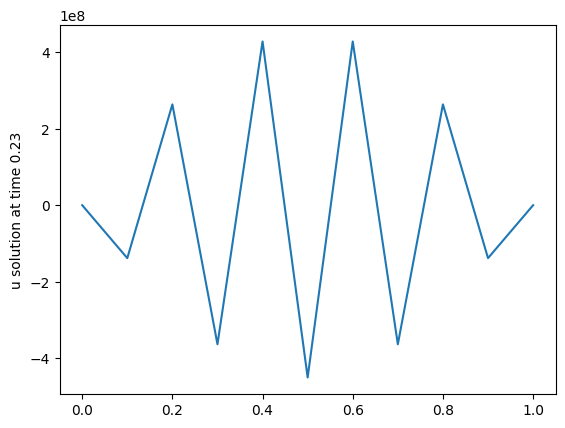

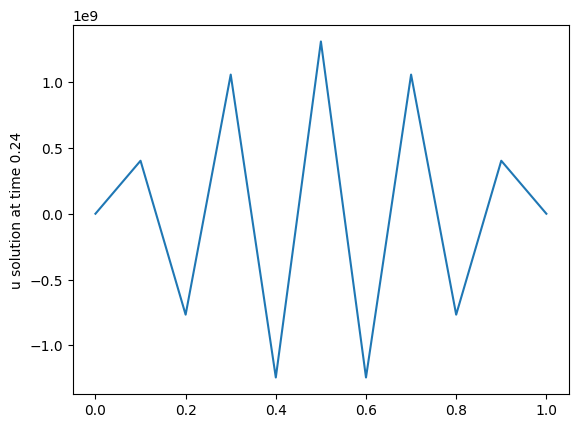

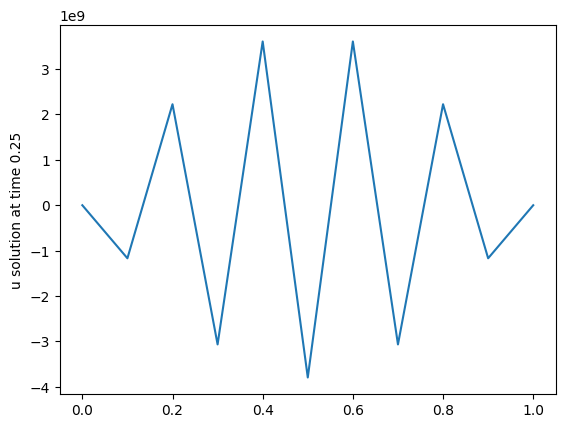

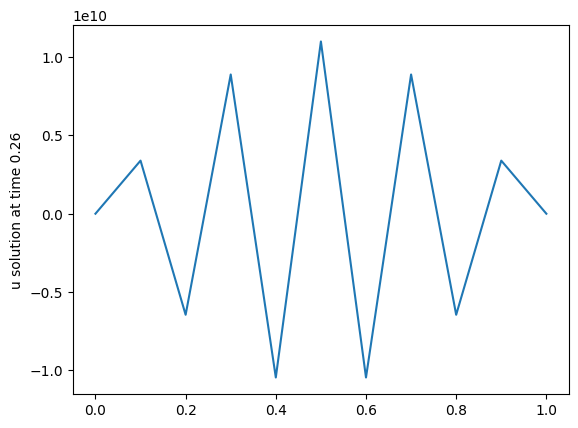

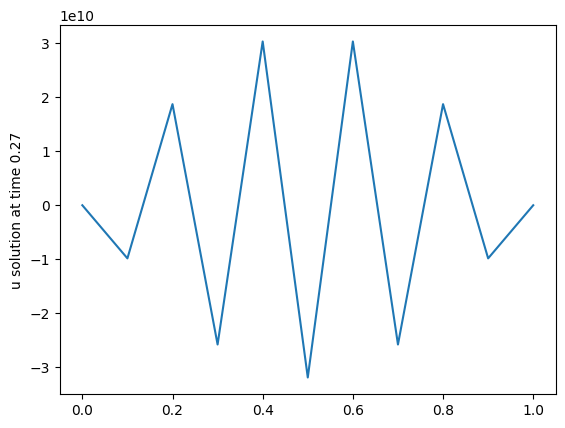

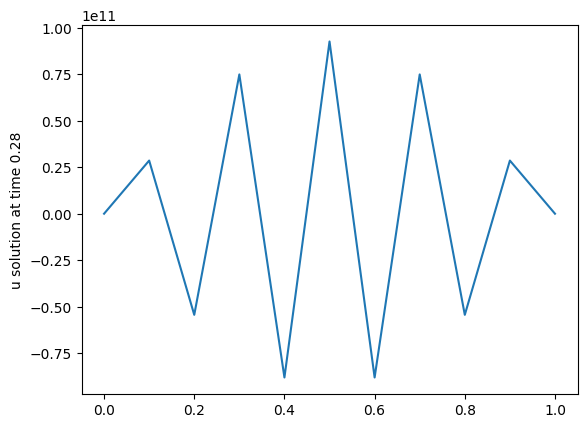

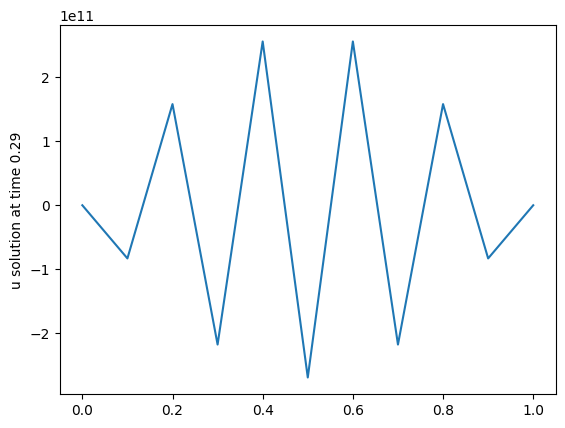

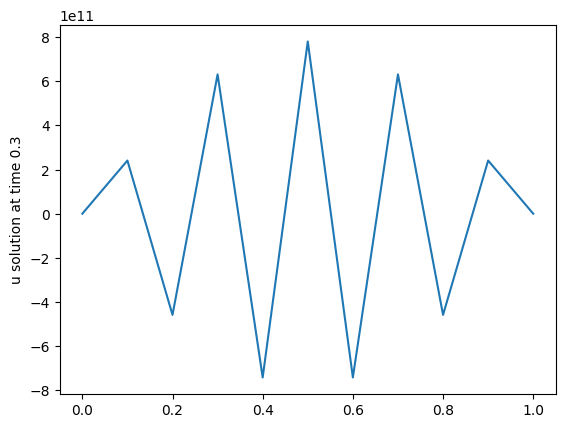

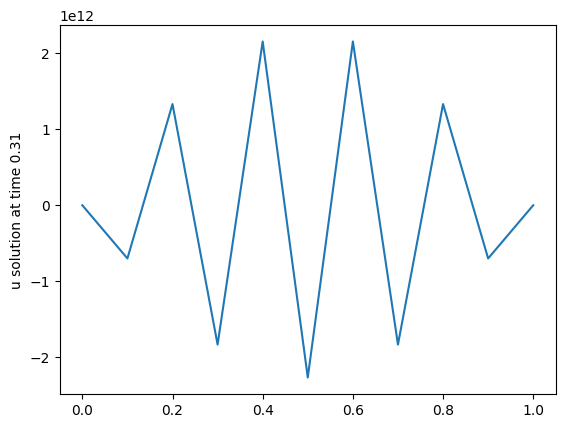

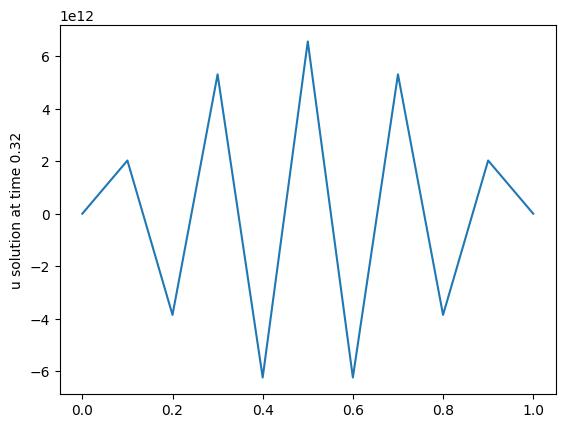

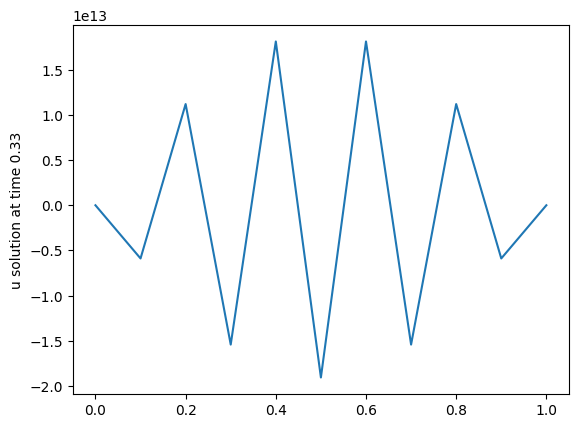

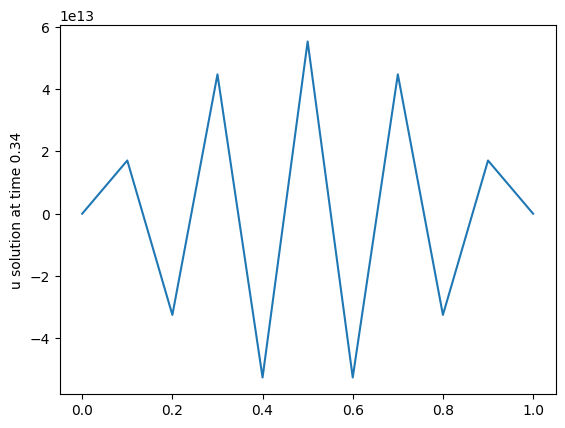

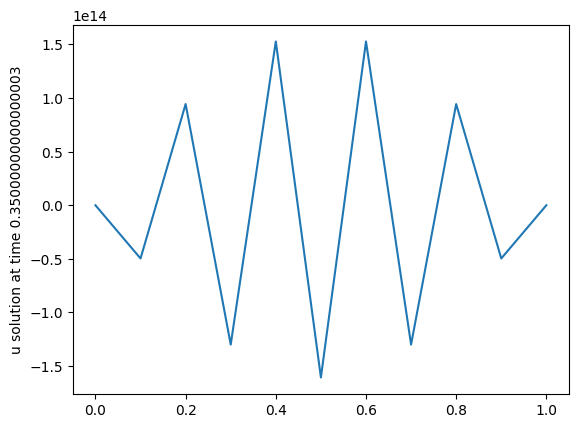

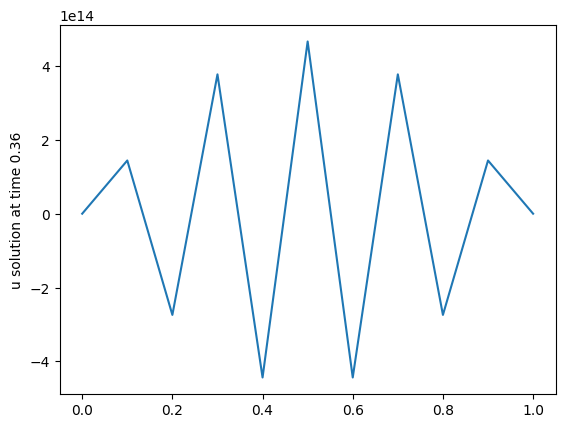

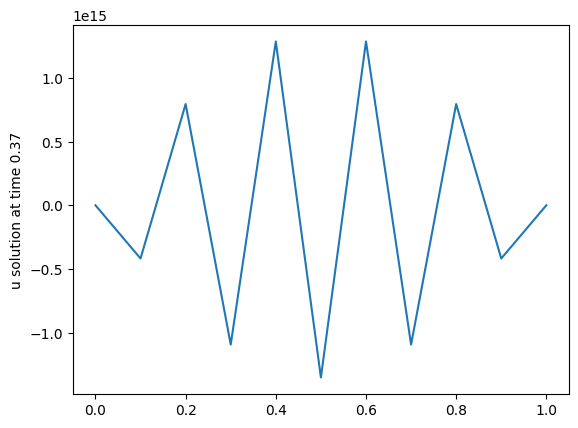

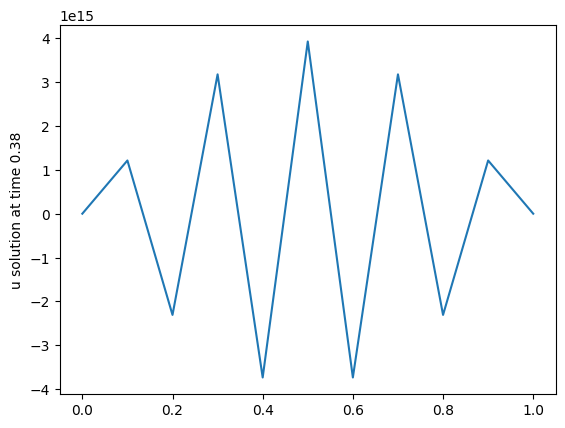

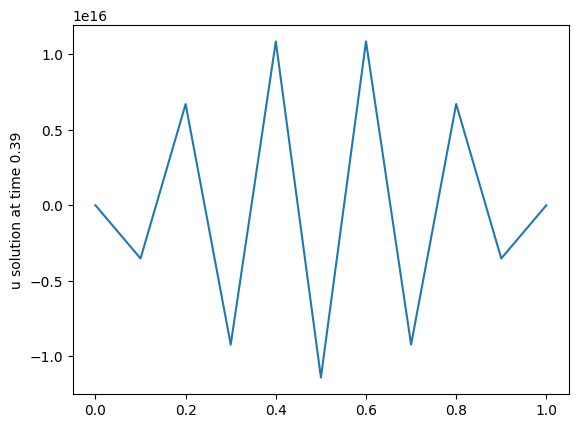

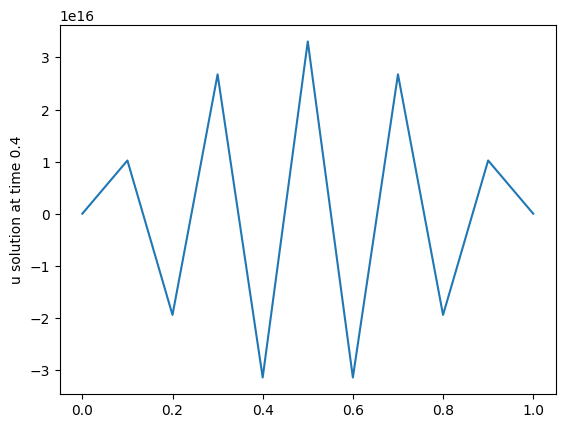

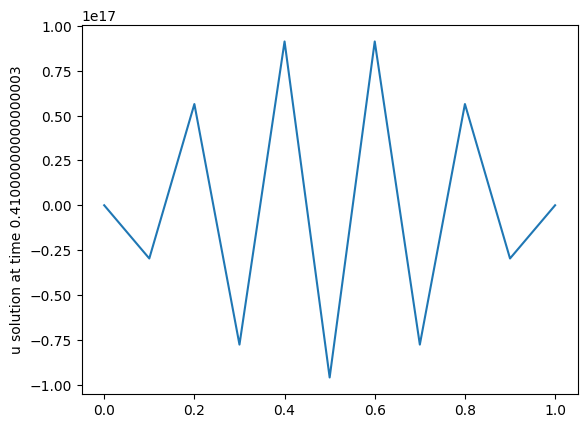

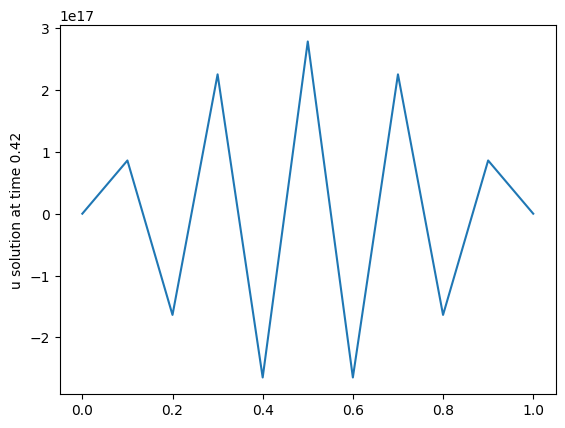

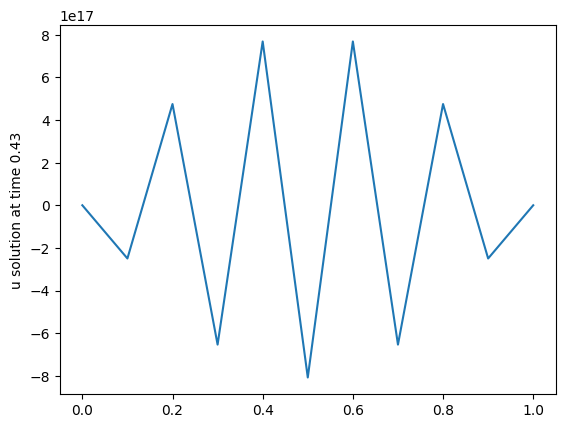

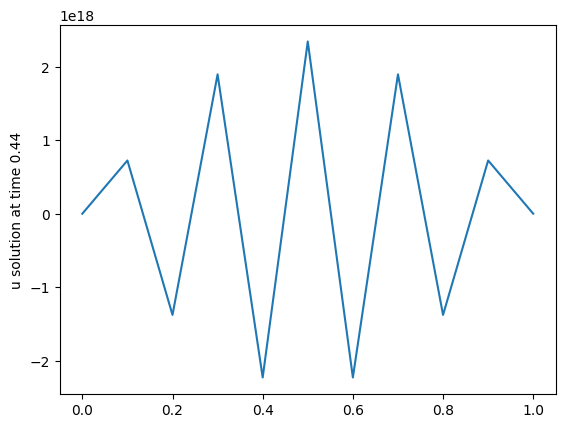

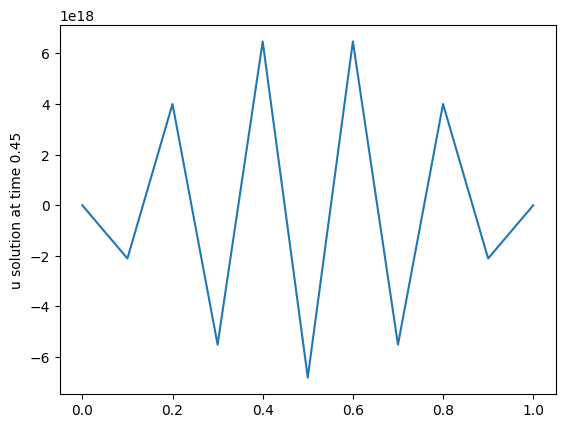

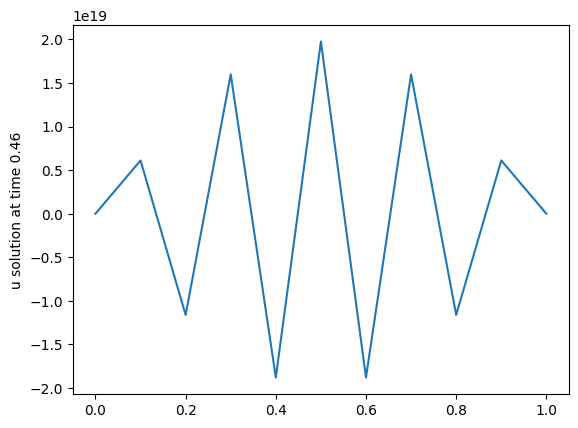

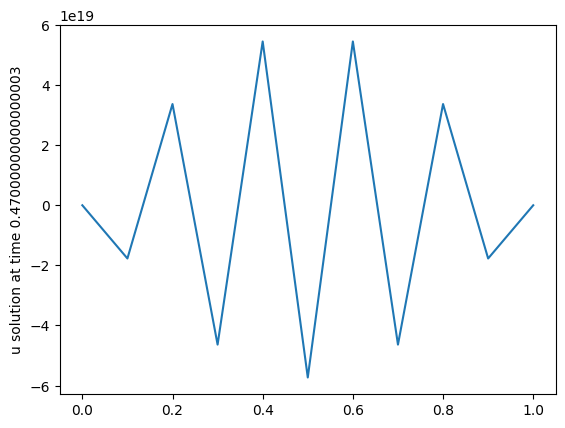

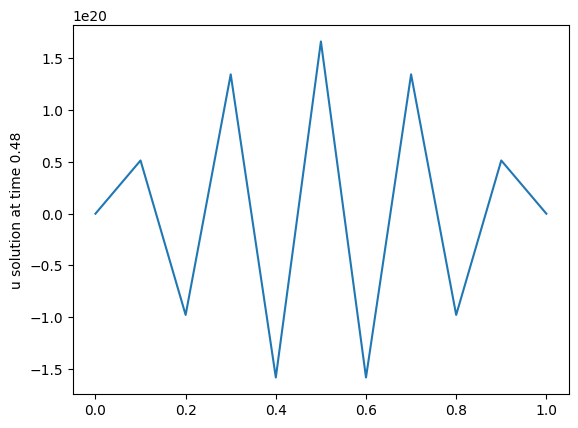

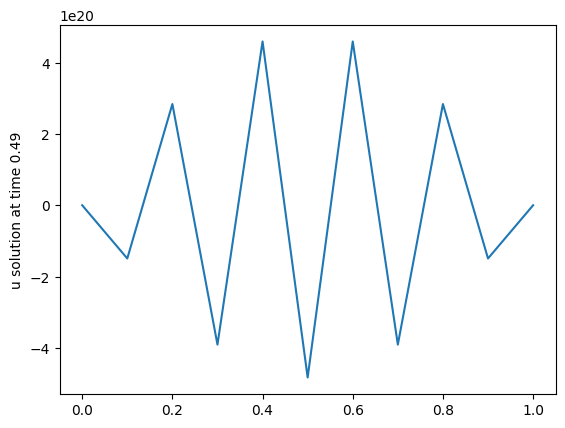

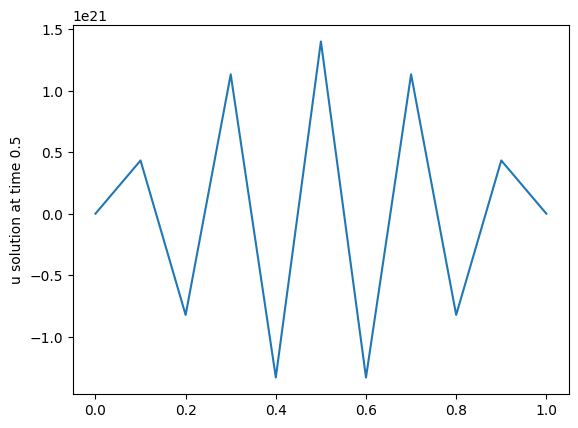

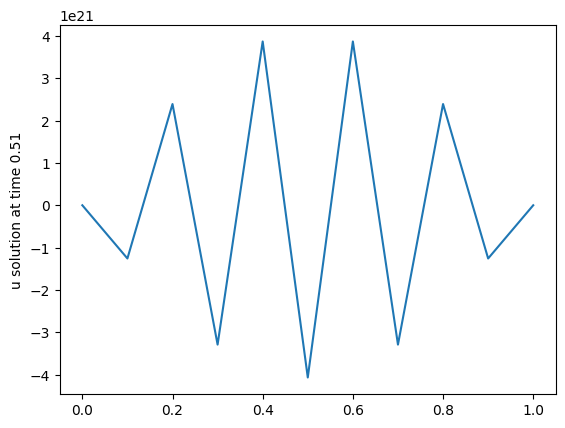

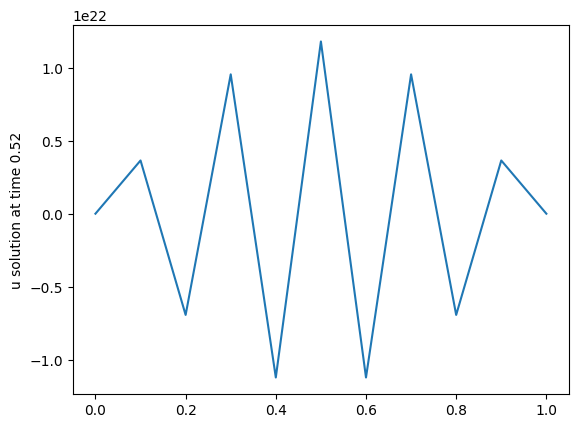

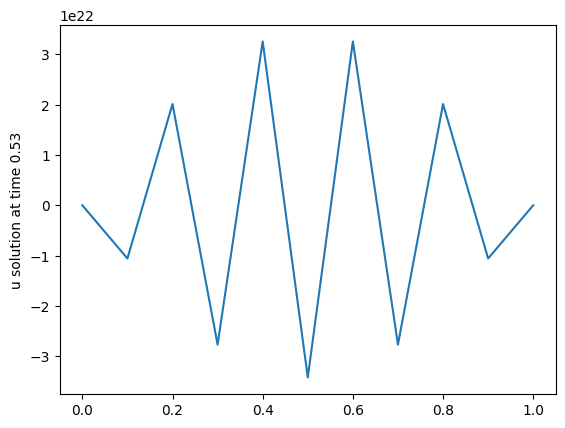

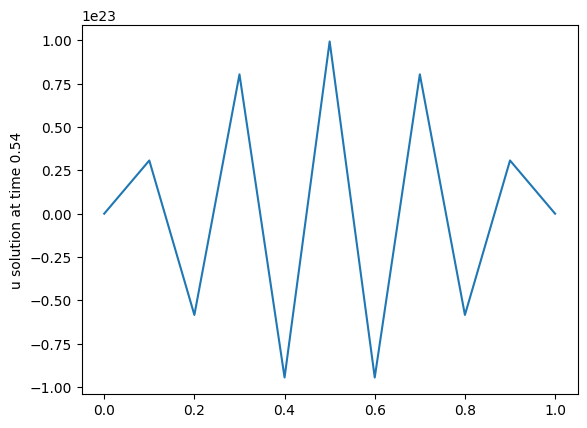

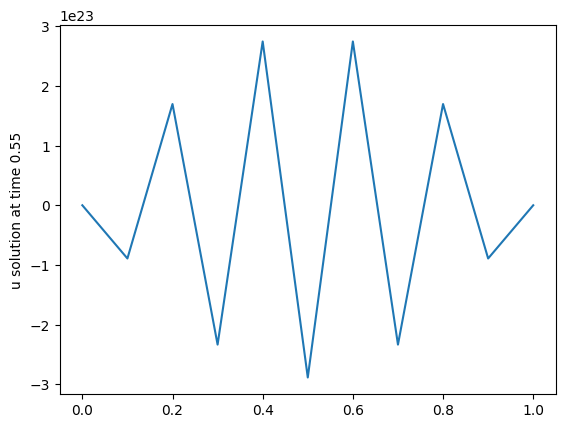

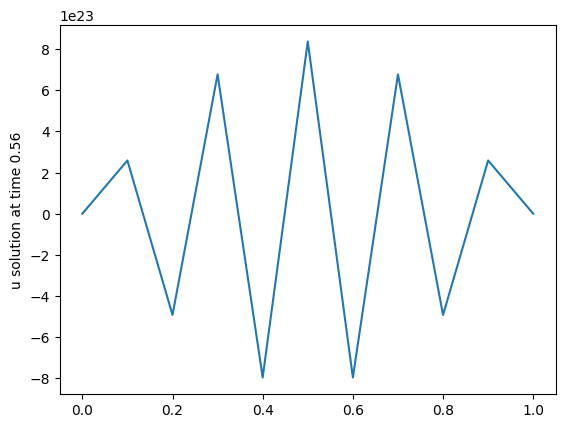

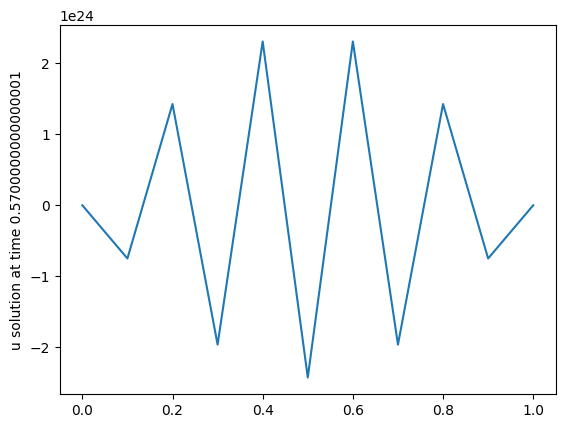

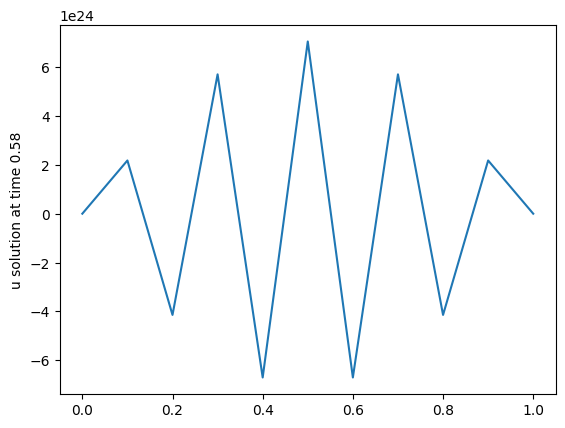

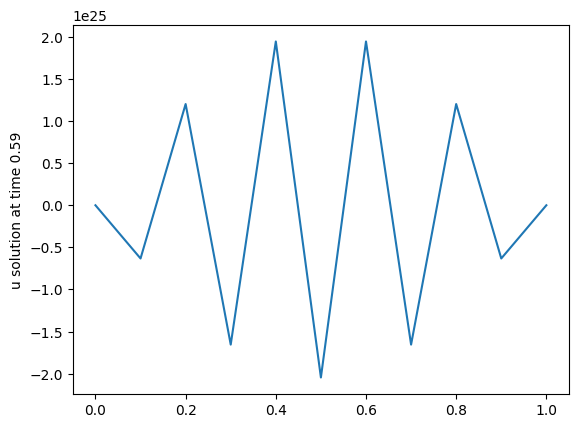

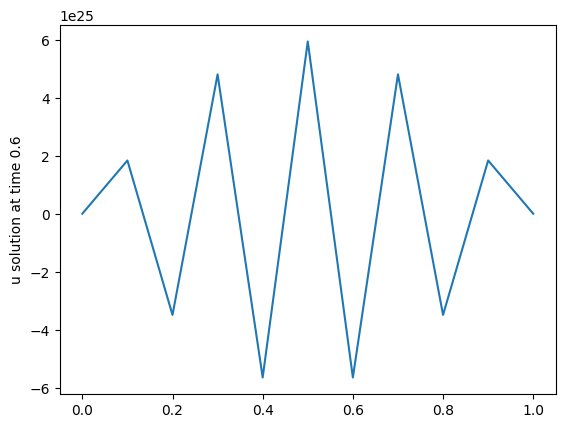

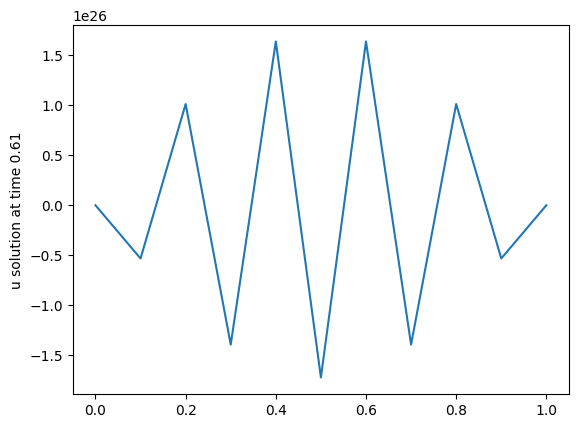

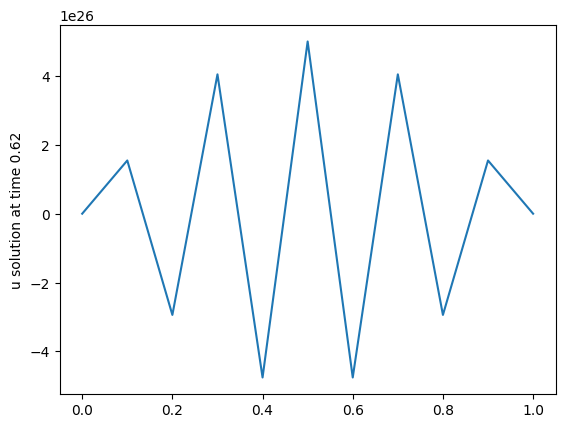

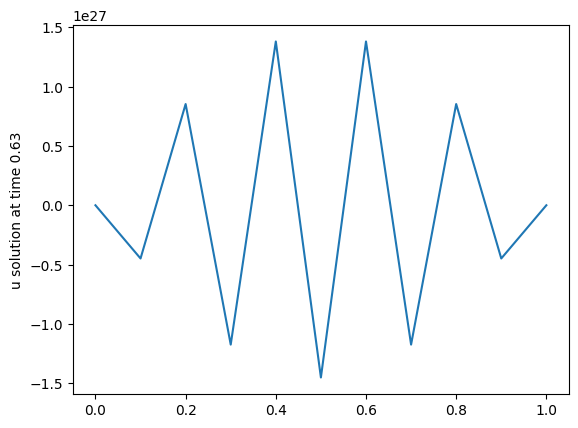

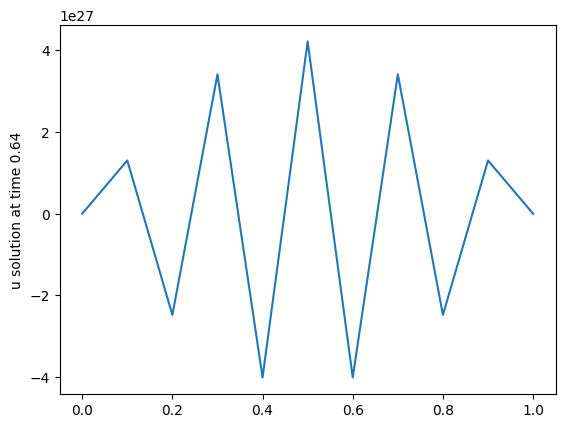

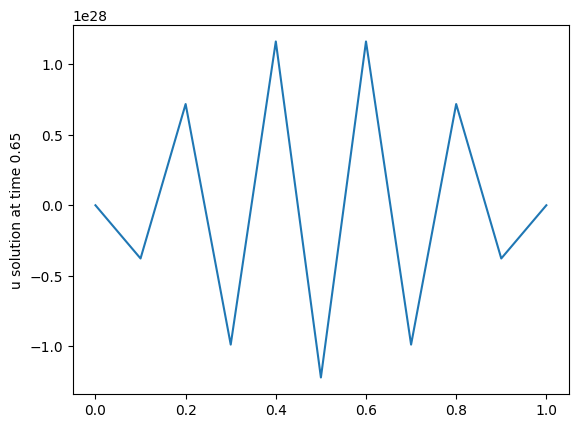

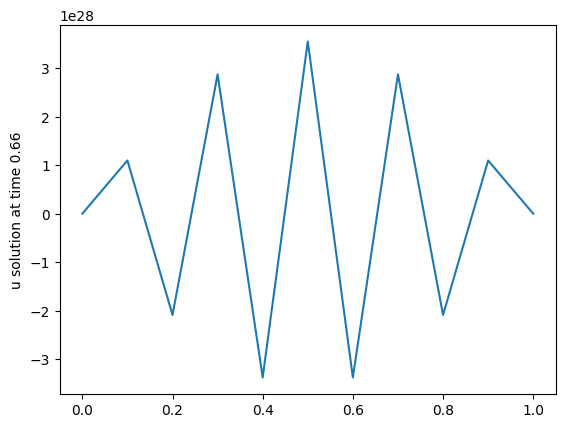

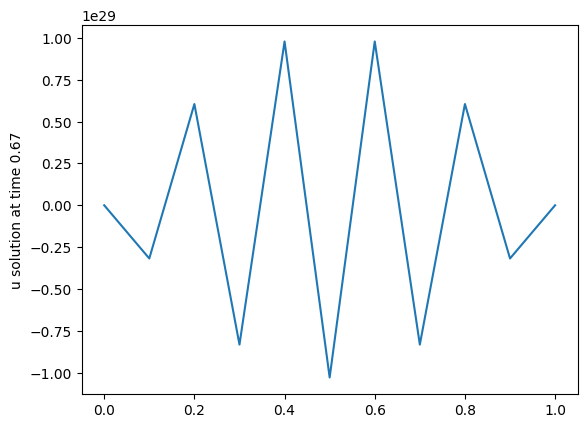

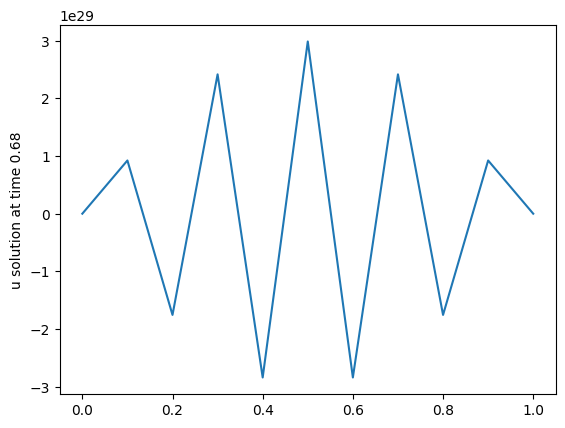

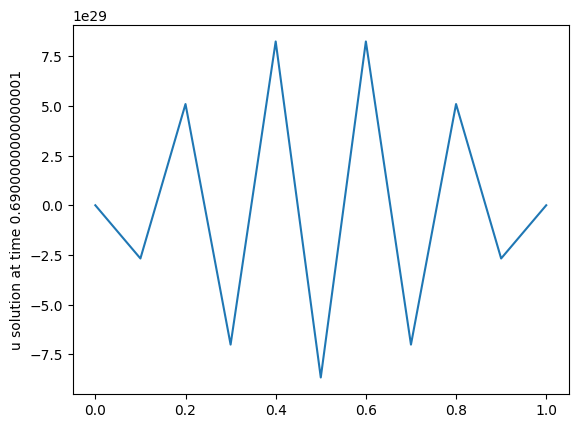

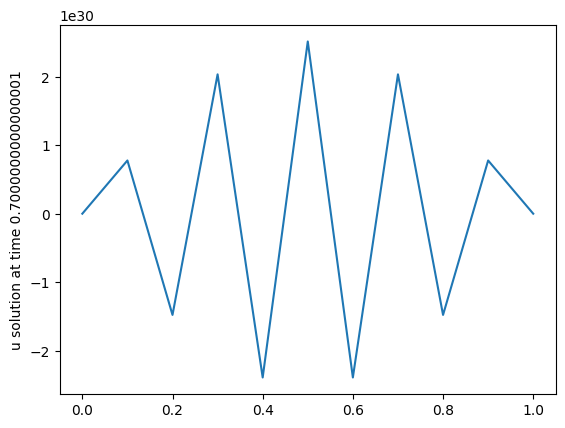

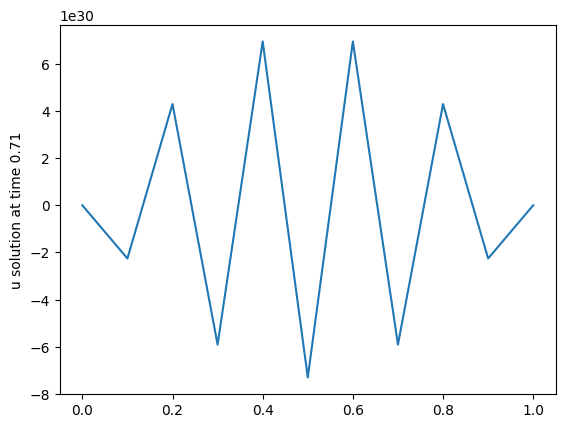

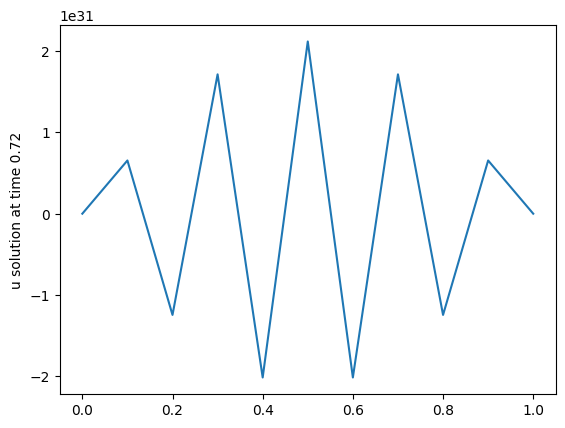

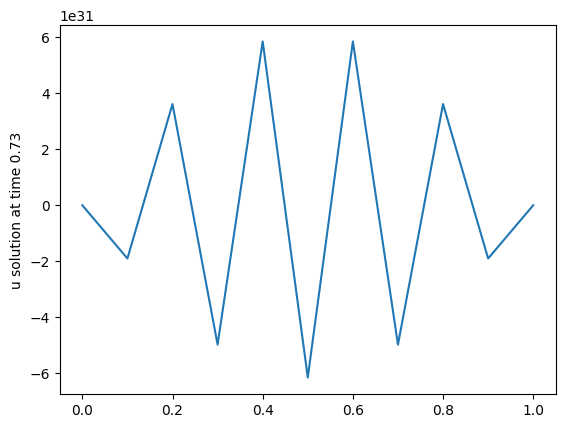

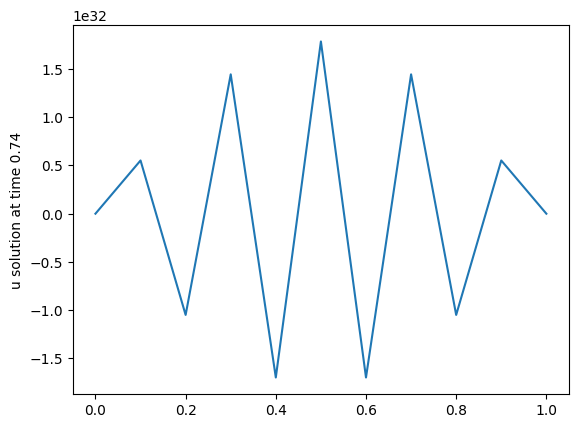

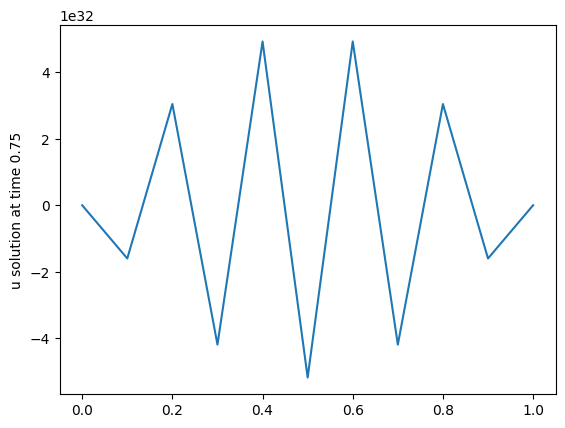

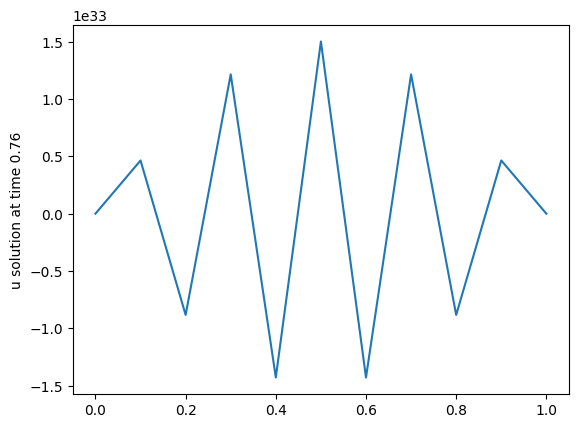

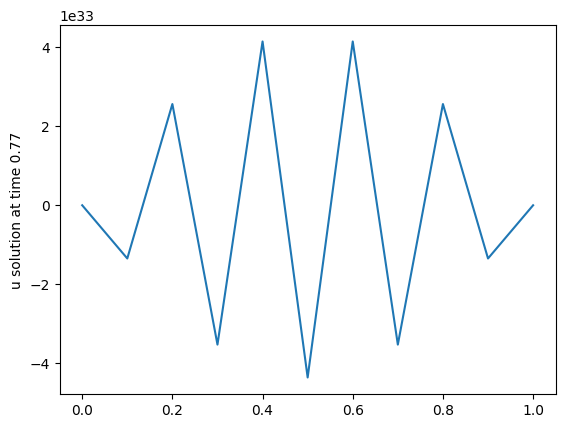

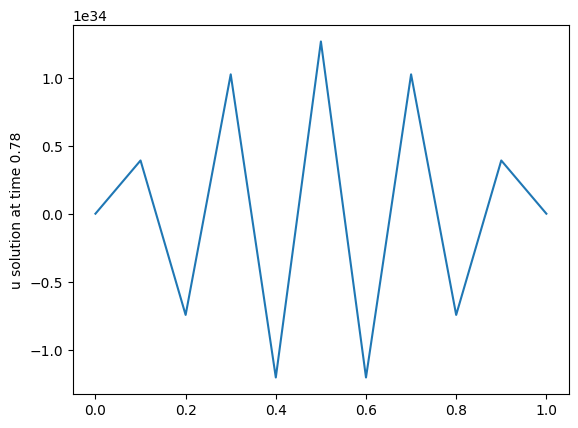

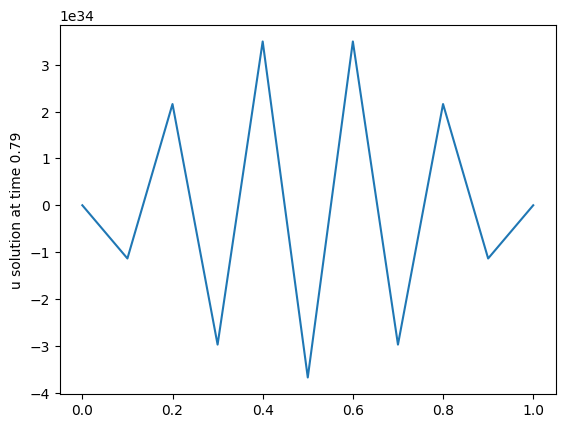

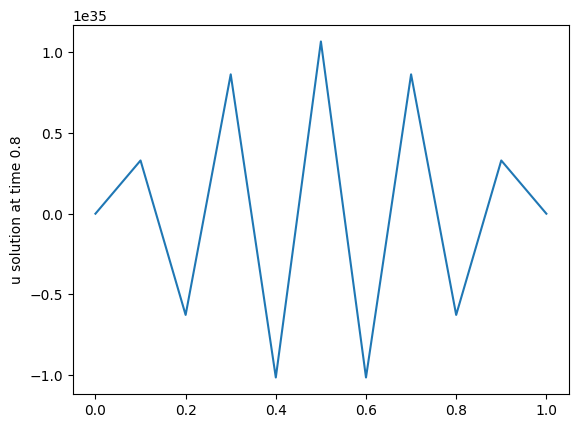

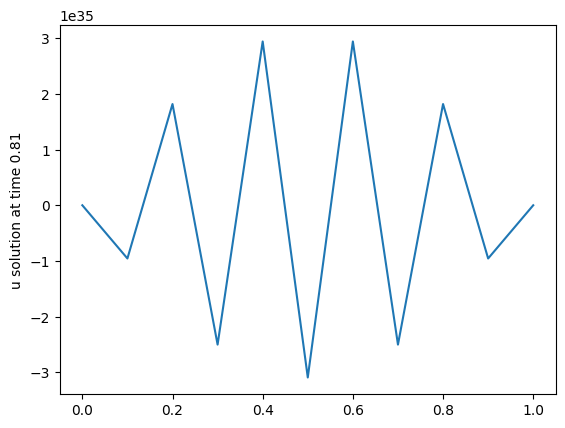

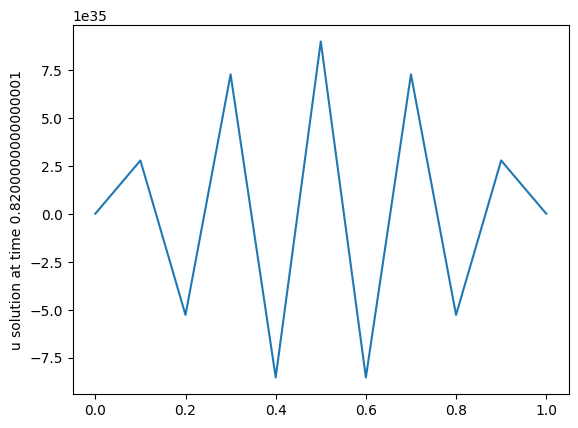

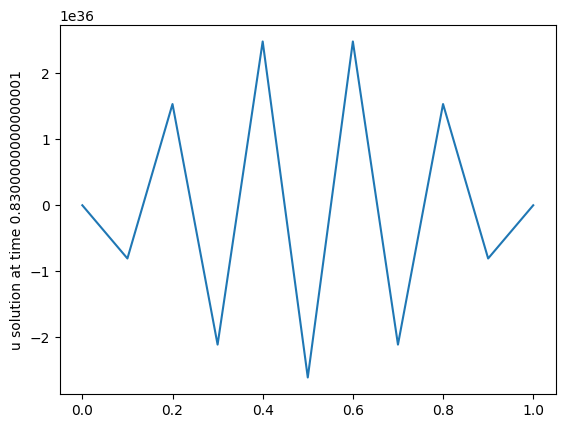

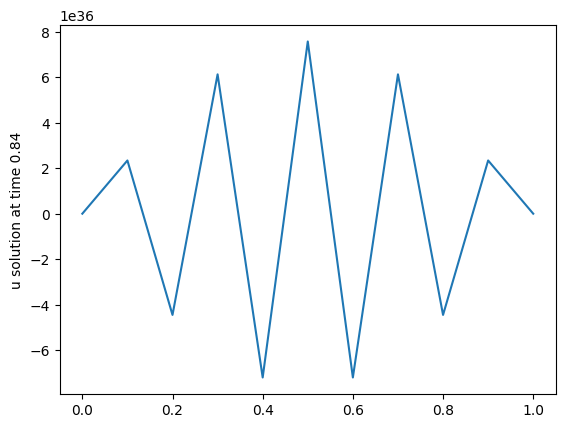

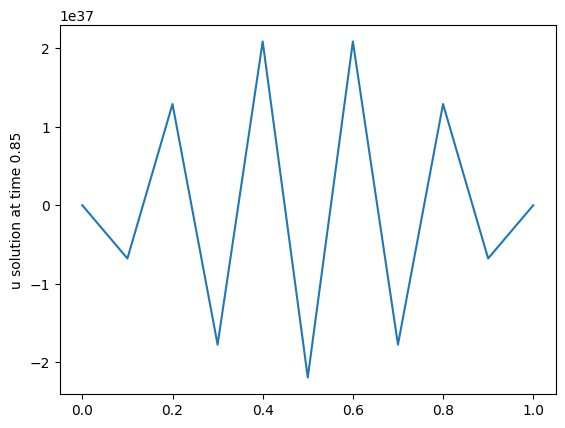

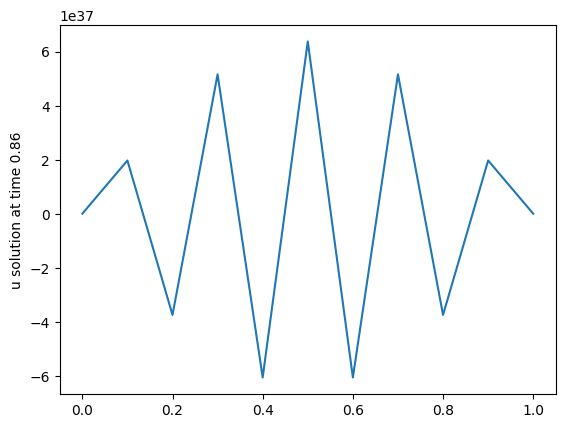

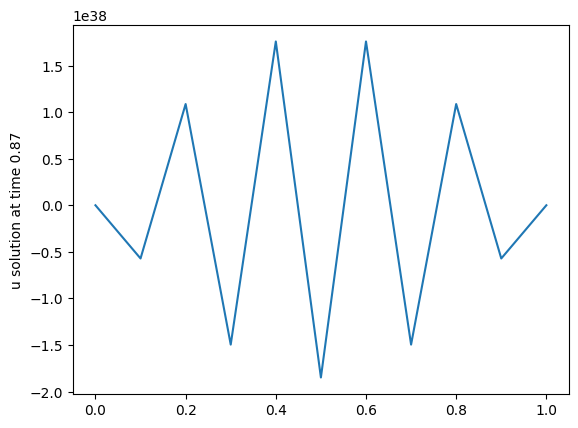

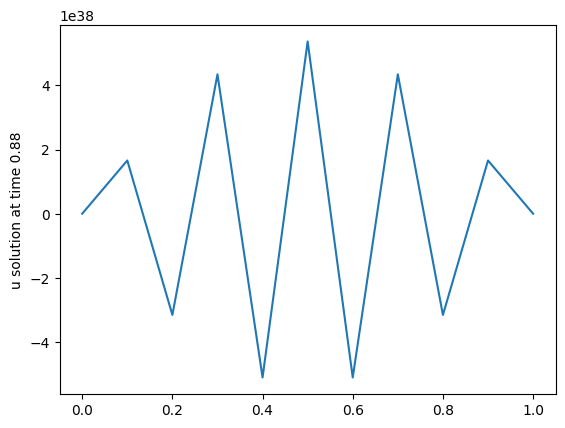

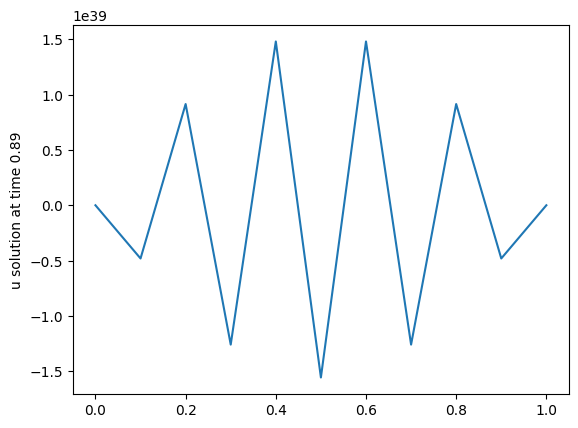

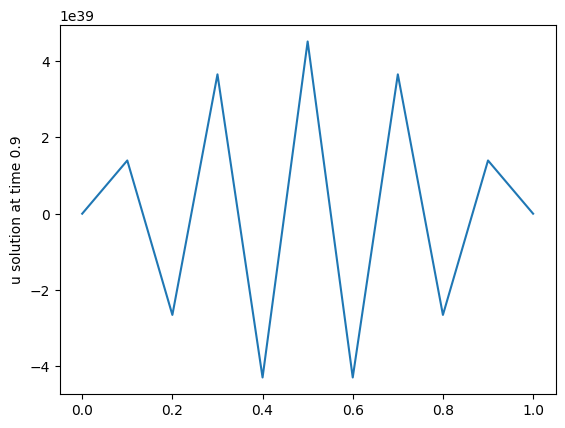

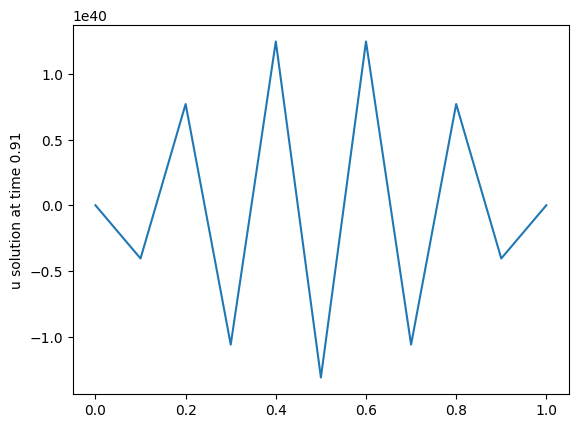

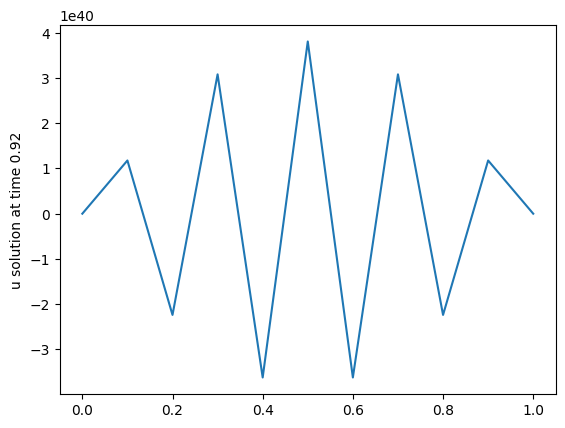

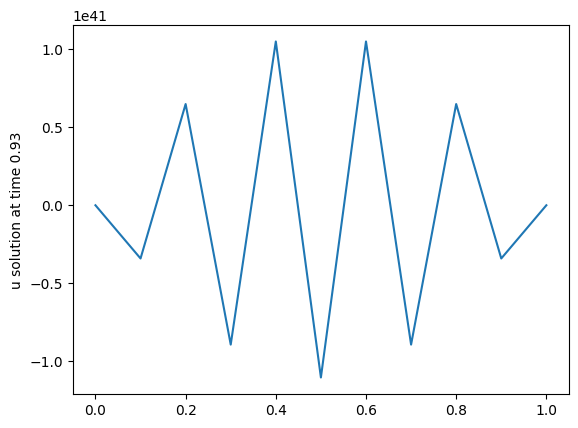

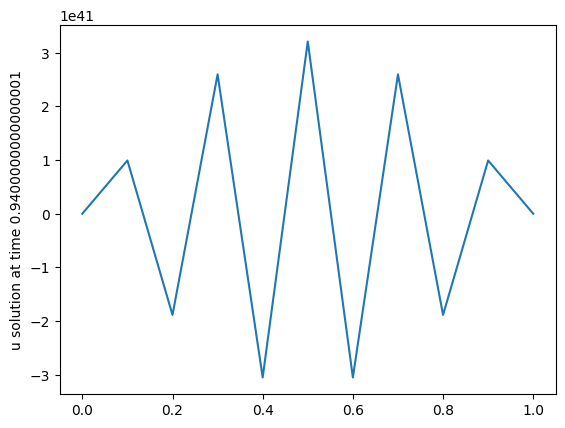

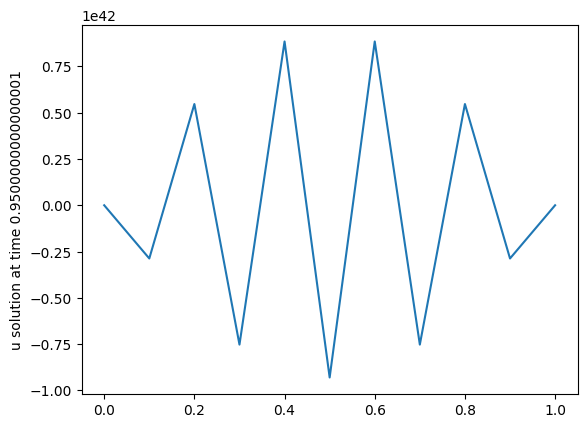

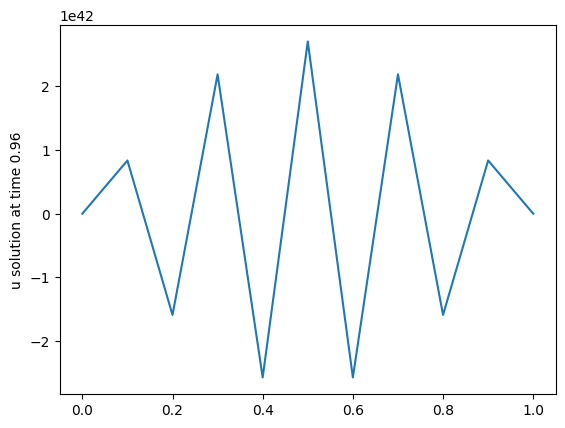

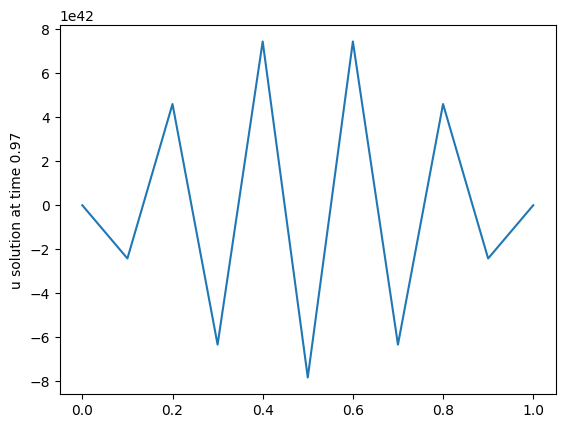

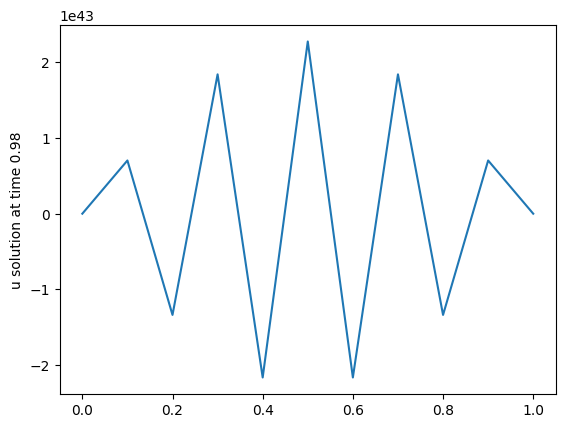

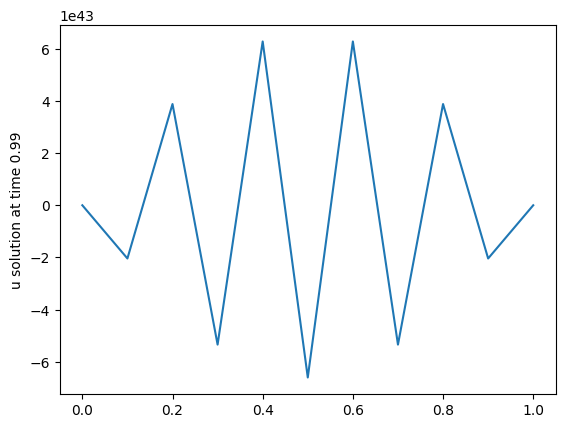

In [4]:
dt = 0.01
dx = 0.1
solution = heat_equation_solution_1(dt,dx,u_0)
plot_soln(solution,dt,dx)